# EARLY DEMENTIA PREDICTION


The dataset for this project was derived from Kaggle.The features in this dataset are being used as key indicators that can be used in the prediction of dementia.Necessary packages needed for the analysis and evaluation of the dataset were successfully imported. 


In [3]:
!pip install seaborn
!pip install scikit-learn
!pip install --upgrade scikit-learn

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
import random
#import seaborn as sns
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,roc_curve
#from sklearn.metrics import precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,f1_score
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import StratifiedKFold, cross_validate
import warnings
warnings.filterwarnings("ignore")


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# The dataset was loaded successfully using the pandas package and it was csv file was read

In [ ]:
#Loading the Dataset
di = pd.read_csv('C:/Users/ELITEBOOK/Downloads/DEMENTIA FOLDER/OPTIMAL_combined_3studies_6feb2020.csv')
di

ID    age  gender  dementia  dementia_all  educationyears        EF  \
0       1  52.67    male       0.0             0            11.0 -2.403333   
1      10  64.58    male       0.0             0            10.0  1.280000   
2     100  74.92    male       0.0             0             8.0 -1.440000   
3     101  74.83    male       1.0             1             9.0       NaN   
4     102  79.25    male       0.0             0            10.0 -0.920000   
...   ...    ...     ...       ...           ...             ...       ...   
1837  989  67.00  female       0.0             0            13.0 -0.100000   
1838  990  71.00  female       0.0             0            13.0 -0.370000   
1839  991  55.00    male       0.0             0            10.0  0.460000   
1840  995  54.00    male       0.0             0            10.0  0.190000   
1841  996  68.00  female       0.0             0            10.0  0.510000   

            PS    Global  diabetes  ... hypercholesterolemia     lacunes_num  \
0    -1.290000 -1.287000         0  ...                  Yes  more-than-zero   
1     0.360000  0.744000         0  ...                  Yes  more-than-zero   
2    -1.520000 -0.922000         0  ...                  Yes  more-than-zero   
3    -2.136271 -1.301102         0  ...                  Yes  more-than-zero   
4    -1.493333 -0.924000         0  ...                  Yes  more-than-zero   
...        ...       ...       ...  ...                  ...             ...   
1837 -0.020000 -0.260000         0  ...                  Yes            zero   
1838 -1.060000 -1.003333         0  ...                  Yes            zero   
1839  0.960000  0.610000         0  ...                  Yes            zero   
1840  0.030000  0.590000         0  ...                  Yes            zero   
1841 -0.530000 -0.100000         0  ...                  Yes  more-than-zero   

     fazekas_cat         study study1 SVD Simple Score SVD Amended Score  \
0         2 to 3         scans  scans              3.0               7.0   
1         0 to 1         scans  scans              2.0               3.0   
2         0 to 1         scans  scans              1.0               2.0   
3         2 to 3         scans  scans              2.0               4.0   
4         2 to 3         scans  scans              2.0               3.0   
...          ...           ...    ...              ...               ...   
1837      0 to 1  ASPS-elderly   ASPS              NaN               NaN   
1838      0 to 1  ASPS-elderly   ASPS              NaN               NaN   
1839      0 to 1  ASPS-elderly   ASPS              0.0               0.0   
1840      0 to 1  ASPS-elderly   ASPS              0.0               0.0   
1841      2 to 3  ASPS-elderly   ASPS              NaN               NaN   

      Fazekas  lac_count  CMB_count  
0           3         >5        >=1  
1           1     1 to 2        >=1  
2           1     1 to 2          0  
3           2     3 to 5          0  
4           2     1 to 2          0  
...       ...        ...        ...  
1837        0       Zero          0  
1838        1       Zero          0  
1839        0       Zero          0  
1840        1       Zero          0  
1841        2     1 to 2          0  

[1842 rows x 22 columns]

In [ ]:
# Create age range bins
#bins = [0, 18, 25, 40, 100]
#labels = ['Youth', 'Young Adult', 'Adult', 'Senior']

# Cut the age column into bins and label the bins
#di['AgeRange'] = pd.cut(di['age'], bins=bins, labels=labels)
#di

# DATA STRUCTURE AND STATISTICAL ANALYSIS


The structure of the dataset was printed as well in order to know the distribution of the dataset. The size, shape and number of rows and columns as well as the data type of every column was also visualized. The statistical measures of the dataset such as the mean, mode, standard deviation was also displayed.


In [ ]:
#Checking the first 10n rows of the dataset
di.head(10)

ID    age  gender  dementia  dementia_all  educationyears        EF  \
0    1  52.67    male       0.0             0            11.0 -2.403333   
1   10  64.58    male       0.0             0            10.0  1.280000   
2  100  74.92    male       0.0             0             8.0 -1.440000   
3  101  74.83    male       1.0             1             9.0       NaN   
4  102  79.25    male       0.0             0            10.0 -0.920000   
5  104  62.75    male       0.0             0            24.0 -0.380000   
6  105  76.00    male       0.0             0            19.0  0.610000   
7  106  69.67  female       0.0             0            12.0  0.730000   
8  107  53.75    male       1.0             1            12.0 -3.086667   
9  108  80.92  female       0.0             0            12.0 -0.060000   

         PS    Global  diabetes  ... hypercholesterolemia     lacunes_num  \
0 -1.290000 -1.287000         0  ...                  Yes  more-than-zero   
1  0.360000  0.744000         0  ...                  Yes  more-than-zero   
2 -1.520000 -0.922000         0  ...                  Yes  more-than-zero   
3 -2.136271 -1.301102         0  ...                  Yes  more-than-zero   
4 -1.493333 -0.924000         0  ...                  Yes  more-than-zero   
5 -1.110000 -0.526667         0  ...                  Yes            zero   
6 -0.403333  0.120000         0  ...                  Yes            zero   
7  0.793333  0.672000         0  ...                  Yes  more-than-zero   
8 -2.616667 -2.178000         0  ...                  Yes  more-than-zero   
9 -0.100000  0.043000         0  ...                  Yes            zero   

  fazekas_cat  study study1 SVD Simple Score SVD Amended Score  Fazekas  \
0      2 to 3  scans  scans              3.0               7.0        3   
1      0 to 1  scans  scans              2.0               3.0        1   
2      0 to 1  scans  scans              1.0               2.0        1   
3      2 to 3  scans  scans              2.0               4.0        2   
4      2 to 3  scans  scans              2.0               3.0        2   
5      2 to 3  scans  scans              0.0               2.0        2   
6      2 to 3  scans  scans              2.0               3.0        2   
7      2 to 3  scans  scans              2.0               3.0        2   
8      2 to 3  scans  scans              3.0               7.0        3   
9      2 to 3  scans  scans              2.0               4.0        3   

   lac_count  CMB_count  
0         >5        >=1  
1     1 to 2        >=1  
2     1 to 2          0  
3     3 to 5          0  
4     1 to 2          0  
5       Zero          0  
6       Zero        >=1  
7     1 to 2          0  
8         >5        >=1  
9       Zero        >=1  

[10 rows x 22 columns]

In [ ]:
#Checking the last 10 rows of the dataset
di.tail(10)

ID   age  gender  dementia  dementia_all  educationyears    EF    PS  \
1832   98  51.0  female       0.0             0            13.0  0.48  1.78   
1833  980  53.0  female       0.0             0            13.0  0.71 -0.27   
1834  983  59.0    male       0.0             0            10.0  0.24  1.07   
1835  985  79.0  female       0.0             0             9.0  0.15 -0.45   
1836  986  61.0  female       0.0             0            10.0  0.43  1.06   
1837  989  67.0  female       0.0             0            13.0 -0.10 -0.02   
1838  990  71.0  female       0.0             0            13.0 -0.37 -1.06   
1839  991  55.0    male       0.0             0            10.0  0.46  0.96   
1840  995  54.0    male       0.0             0            10.0  0.19  0.03   
1841  996  68.0  female       0.0             0            10.0  0.51 -0.53   

        Global  diabetes  ... hypercholesterolemia     lacunes_num  \
1832  1.093333         0  ...                  Yes            zero   
1833  0.333333         0  ...                  Yes            zero   
1834  0.470000         0  ...                  Yes            zero   
1835 -0.193333         0  ...                  Yes            zero   
1836  0.480000         0  ...                  Yes            zero   
1837 -0.260000         0  ...                  Yes            zero   
1838 -1.003333         0  ...                  Yes            zero   
1839  0.610000         0  ...                  Yes            zero   
1840  0.590000         0  ...                  Yes            zero   
1841 -0.100000         0  ...                  Yes  more-than-zero   

     fazekas_cat         study study1 SVD Simple Score SVD Amended Score  \
1832      0 to 1  ASPS-elderly   ASPS              0.0               0.0   
1833      0 to 1  ASPS-elderly   ASPS              1.0               1.0   
1834      0 to 1  ASPS-elderly   ASPS              NaN               NaN   
1835      0 to 1  ASPS-elderly   ASPS              NaN               NaN   
1836      0 to 1  ASPS-elderly   ASPS              NaN               NaN   
1837      0 to 1  ASPS-elderly   ASPS              NaN               NaN   
1838      0 to 1  ASPS-elderly   ASPS              NaN               NaN   
1839      0 to 1  ASPS-elderly   ASPS              0.0               0.0   
1840      0 to 1  ASPS-elderly   ASPS              0.0               0.0   
1841      2 to 3  ASPS-elderly   ASPS              NaN               NaN   

      Fazekas  lac_count  CMB_count  
1832        0       Zero          0  
1833        0       Zero        >=1  
1834        1       Zero          0  
1835        1       Zero          0  
1836        1       Zero          0  
1837        0       Zero          0  
1838        1       Zero          0  
1839        0       Zero          0  
1840        1       Zero          0  
1841        2     1 to 2          0  

[10 rows x 22 columns]

In [ ]:
#CHECKING THE NUMBER OF ROWS AND COLUMNS
di.shape

(1842, 22)

In [ ]:
#CHECKING THE SIZE OF THE DATASET
di.size

40524

In [ ]:
#CHECKING FOR THE DATA TYPES IN THE DATASET
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1842 non-null   int64  
 1   age                   1842 non-null   float64
 2   gender                1842 non-null   object 
 3   dementia              1808 non-null   float64
 4   dementia_all          1842 non-null   int64  
 5   educationyears        1842 non-null   float64
 6   EF                    1634 non-null   float64
 7   PS                    1574 non-null   float64
 8   Global                1534 non-null   float64
 9   diabetes              1842 non-null   int64  
 10  smoking               1831 non-null   object 
 11  hypertension          1842 non-null   object 
 12  hypercholesterolemia  1842 non-null   object 
 13  lacunes_num           1842 non-null   object 
 14  fazekas_cat           1842 non-null   object 
 15  study                

In [ ]:
#CHECKING THE STATISTICAL MEASURES OF THE DATASET
di.describe()

ID          age     dementia  dementia_all  educationyears  \
count    1842.000000  1842.000000  1808.000000   1842.000000     1842.000000   
mean    29897.929967    65.952588     0.045354      0.062975       11.139522   
std     67056.874773     8.923488     0.208137      0.242984        2.983946   
min         1.000000    38.000000     0.000000      0.000000        1.000000   
25%       223.500000    60.000000     0.000000      0.000000        9.000000   
50%       612.500000    66.151393     0.000000      0.000000       10.000000   
75%      1713.250000    73.000000     0.000000      0.000000       13.000000   
max    211301.000000    90.000000     1.000000      1.000000       24.000000   

                EF           PS       Global     diabetes  SVD Simple Score  \
count  1634.000000  1574.000000  1534.000000  1842.000000       1165.000000   
mean     -0.063088    -0.066649    -0.026860     0.122693          0.719313   
std       0.785264     0.871836     0.677071     0.328173          0.932063   
min      -5.200000    -2.680000    -2.420000     0.000000          0.000000   
25%      -0.436896    -0.670805    -0.476881     0.000000          0.000000   
50%       0.130000    -0.020000     0.006667     0.000000          0.000000   
75%       0.484327     0.550000     0.423333     0.000000          1.000000   
max       2.350000     2.730000     1.853333     1.000000          3.000000   

       SVD Amended Score      Fazekas  
count        1165.000000  1842.000000  
mean            1.491845     1.311075  
std             1.623277     0.799495  
min             0.000000     0.000000  
25%             0.000000     1.000000  
50%             1.000000     1.000000  
75%             2.000000     2.000000  
max             7.000000     3.000000

# DATA PREPROCESSING 

The number of duplicated values as well as the number of missing values were also printed, and it was established that there were neither any missing nor duplicated values.

In [ ]:
#CHECKING FOR DUPLICATE VALUES
di.duplicated().sum()

0

In [ ]:
#CHECKING THE COLUMNS  IN THE DATASET
di.columns

Index(['ID', 'age', 'gender', 'dementia', 'dementia_all', 'educationyears',
       'EF', 'PS', 'Global', 'diabetes', 'smoking', 'hypertension',
       'hypercholesterolemia', 'lacunes_num', 'fazekas_cat', 'study', 'study1',
       'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'lac_count',
       'CMB_count'],
      dtype='object')

In [ ]:
#CHECKING FOR THE NUMBER OF MISSING VALUES IN THE DATASET
di.isnull().sum()

ID                        0
age                       0
gender                    0
dementia                 34
dementia_all              0
educationyears            0
EF                      208
PS                      268
Global                  308
diabetes                  0
smoking                  11
hypertension              0
hypercholesterolemia      0
lacunes_num               0
fazekas_cat               0
study                     0
study1                    0
SVD Simple Score        677
SVD Amended Score       677
Fazekas                   0
lac_count                 0
CMB_count                 0
dtype: int64

In [ ]:
#Removing unnessecary columns

In [ ]:
#di.drop("dementia", axis=1, inplace=True)
#di.drop("ID", axis=1, inplace=True)
#di.drop("study1", axis=1, inplace=True)

In [ ]:
#Dealing with missing values
di["EF"].fillna(di["EF"].median(), inplace=True)
di["PS"].fillna(di["PS"].median(), inplace=True)
di["Global"].fillna(di["Global"].median(), inplace=True)
di["SVD Simple Score"].fillna(di["SVD Simple Score"].median(), inplace=True)
di["SVD Amended Score"].fillna(di["SVD Amended Score"].median(), inplace=True)
di["smoking"].fillna(di["smoking"].mode(), inplace=True)

In [ ]:
di.head()


age gender  dementia_all  educationyears        EF        PS    Global  \
0  52.67   male             0            11.0 -2.403333 -1.290000 -1.287000   
1  64.58   male             0            10.0  1.280000  0.360000  0.744000   
2  74.92   male             0             8.0 -1.440000 -1.520000 -0.922000   
3  74.83   male             1             9.0  0.130000 -2.136271 -1.301102   
4  79.25   male             0            10.0 -0.920000 -1.493333 -0.924000   

   diabetes         smoking hypertension hypercholesterolemia     lacunes_num  \
0         0  current-smoker          Yes                  Yes  more-than-zero   
1         0       ex-smoker          Yes                  Yes  more-than-zero   
2         0    never-smoker          Yes                  Yes  more-than-zero   
3         0  current-smoker          Yes                  Yes  more-than-zero   
4         0       ex-smoker          Yes                  Yes  more-than-zero   

  fazekas_cat  study  SVD Simple Score  SVD Amended Score  Fazekas lac_count  \
0      2 to 3  scans               3.0                7.0        3        >5   
1      0 to 1  scans               2.0                3.0        1    1 to 2   
2      0 to 1  scans               1.0                2.0        1    1 to 2   
3      2 to 3  scans               2.0                4.0        2    3 to 5   
4      2 to 3  scans               2.0                3.0        2    1 to 2   

  CMB_count  
0       >=1  
1       >=1  
2         0  
3         0  
4         0

# EXPLORATORY DATA ANALYSIS AND VISUALIZATION



In order to gain better understanding of the trends and patterns of the dataset, the number of categorical and numerical columns were displayed as well as the number of unique values in both columns and they were finally visualized in order to get a visual presentation of the dataset.

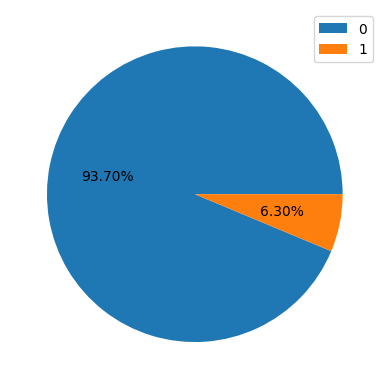

In [ ]:
counts = di["dementia_all"].value_counts()
plt.pie(counts, autopct="%0.2f%%")
plt.legend(counts.index)
plt.show()

In [ ]:
#CHECKING FOR THE NUMBER OF CATEGORICAL COLUMNS
cat = di.select_dtypes(include='object').columns
len(cat)

9

In [ ]:
#CHECKING FOR UNIQUE VALUES IN THE CATEGORICAL COLUMNS
for i in cat:
    print("The no.of unique values in",i,"are: ",di.loc[:,i].nunique())

The no.of unique values in gender are:  2
The no.of unique values in smoking are:  3
The no.of unique values in hypertension are:  2
The no.of unique values in hypercholesterolemia are:  2
The no.of unique values in lacunes_num are:  2
The no.of unique values in fazekas_cat are:  2
The no.of unique values in study are:  4
The no.of unique values in lac_count are:  4
The no.of unique values in CMB_count are:  2


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
di 

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(di.drop('dementia_all', axis=1))

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Number of principal components to retain
n_components = 7
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

# Visualize the data in the reduced feature space
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=di['dementia_all'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

# Use the reduced feature set for further analysis or modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, di['dementia_all'], test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

NameError: name 'di' is not defined

# UNIVARIATE ANALYSIS

A visual statistical analysis for all the categorical and numerical columns was generated in order to gain an understanding about its characteristics.


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


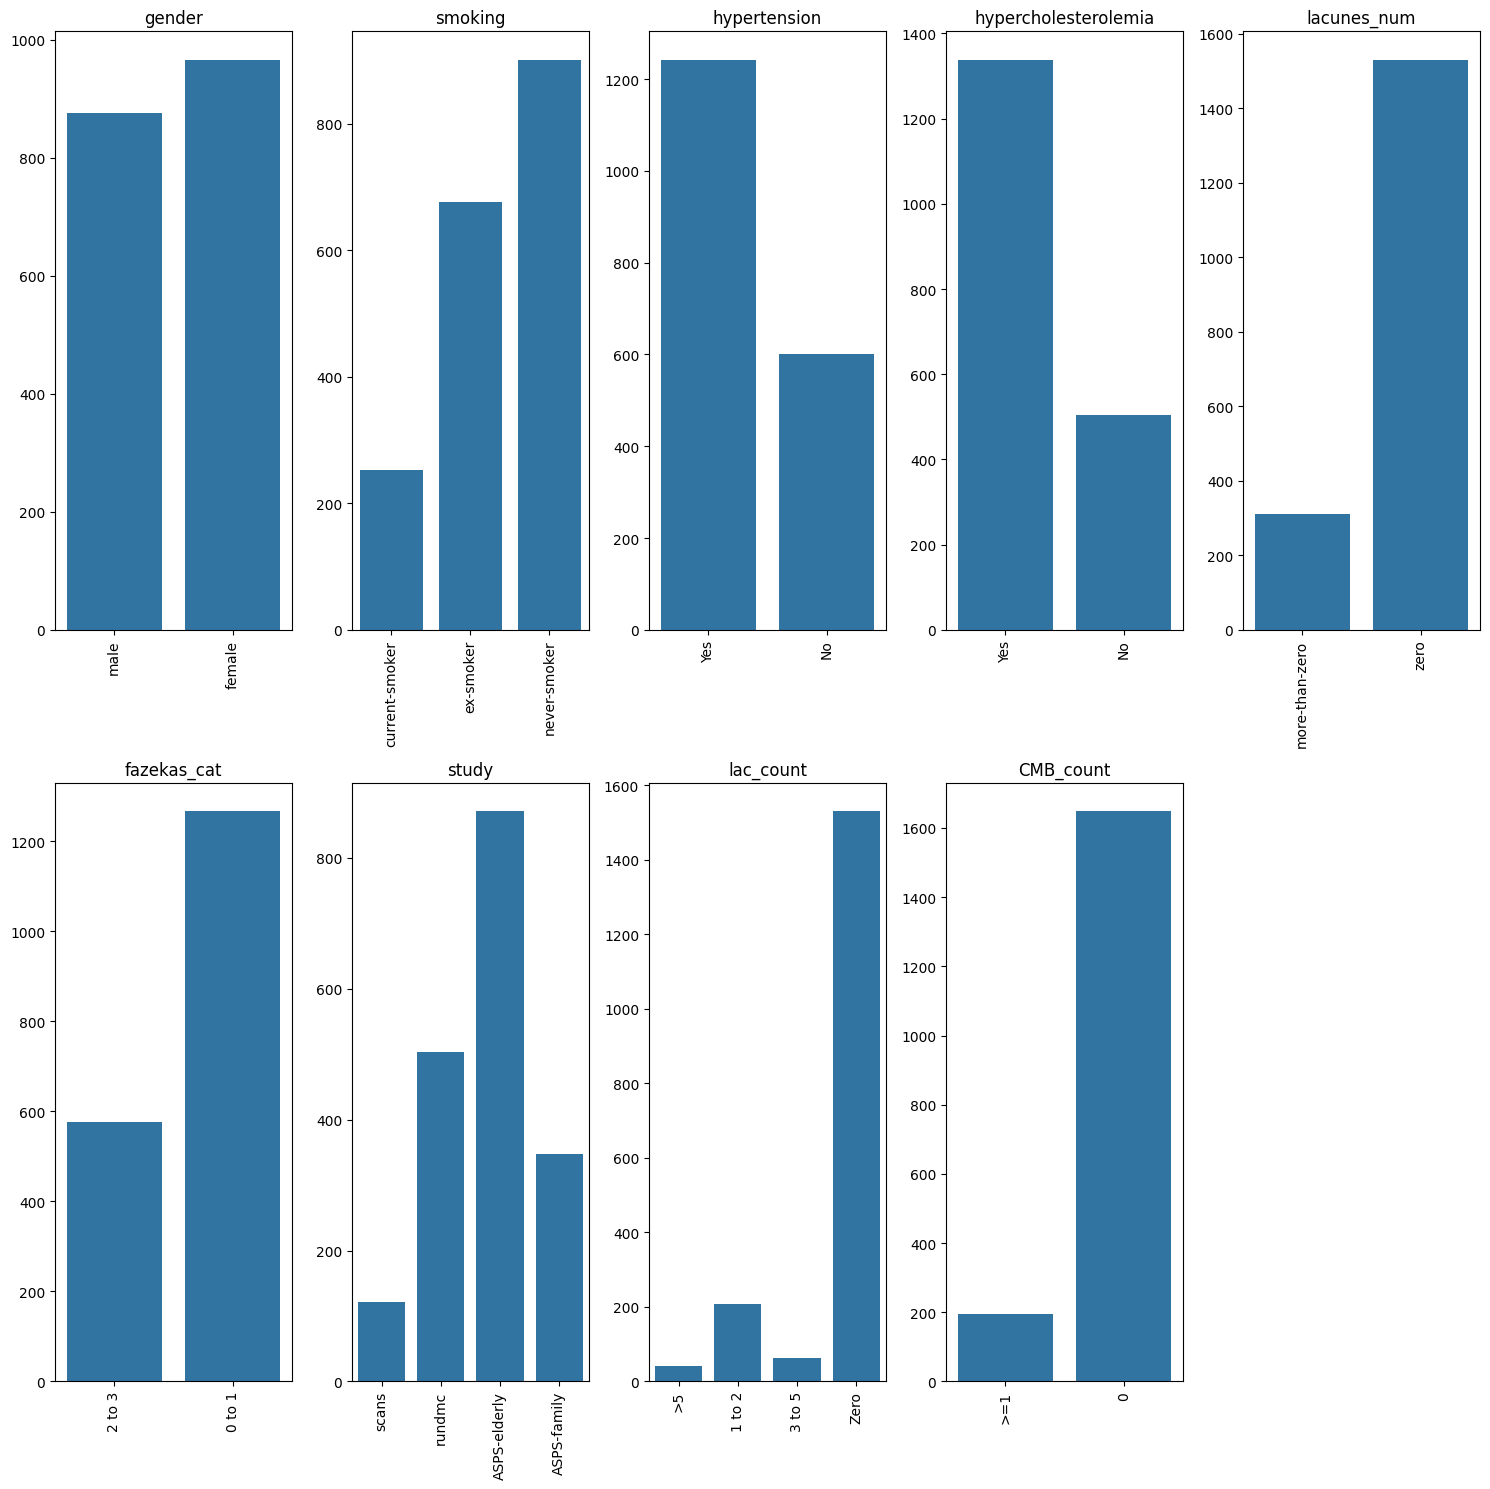

In [ ]:
!pip install seaborn
import seaborn as sns
#plt.style.use('seaborn')



#visualizing categorical columns
num_plots = len(cat)
num_cols = 5
num_rows = num_plots // num_cols + int(num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(cat):
    sns.countplot(x=col, data=di, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelrotation=90)
for i in range(num_plots, num_rows*num_cols):
    axes[i].set_visible(False)
fig.tight_layout()
plt.show()

In [ ]:
#CHECKING FOR THE NUMBER OF NUMERICAL VALUES
num = di.select_dtypes(include=np.number).columns
len(num)

10

In [ ]:
#CHECKING FOR UNIQUE VALUES IN THE NUMERICAL COLUMNS
for i in num:
    print("The no.of unique values in",i,"are: ",di.loc[:,i].nunique())

The no.of unique values in age are:  630
The no.of unique values in dementia_all are:  2
The no.of unique values in educationyears are:  26
The no.of unique values in EF are:  686
The no.of unique values in PS are:  738
The no.of unique values in Global are:  1014
The no.of unique values in diabetes are:  2
The no.of unique values in SVD Simple Score are:  4
The no.of unique values in SVD Amended Score are:  8
The no.of unique values in Fazekas are:  4


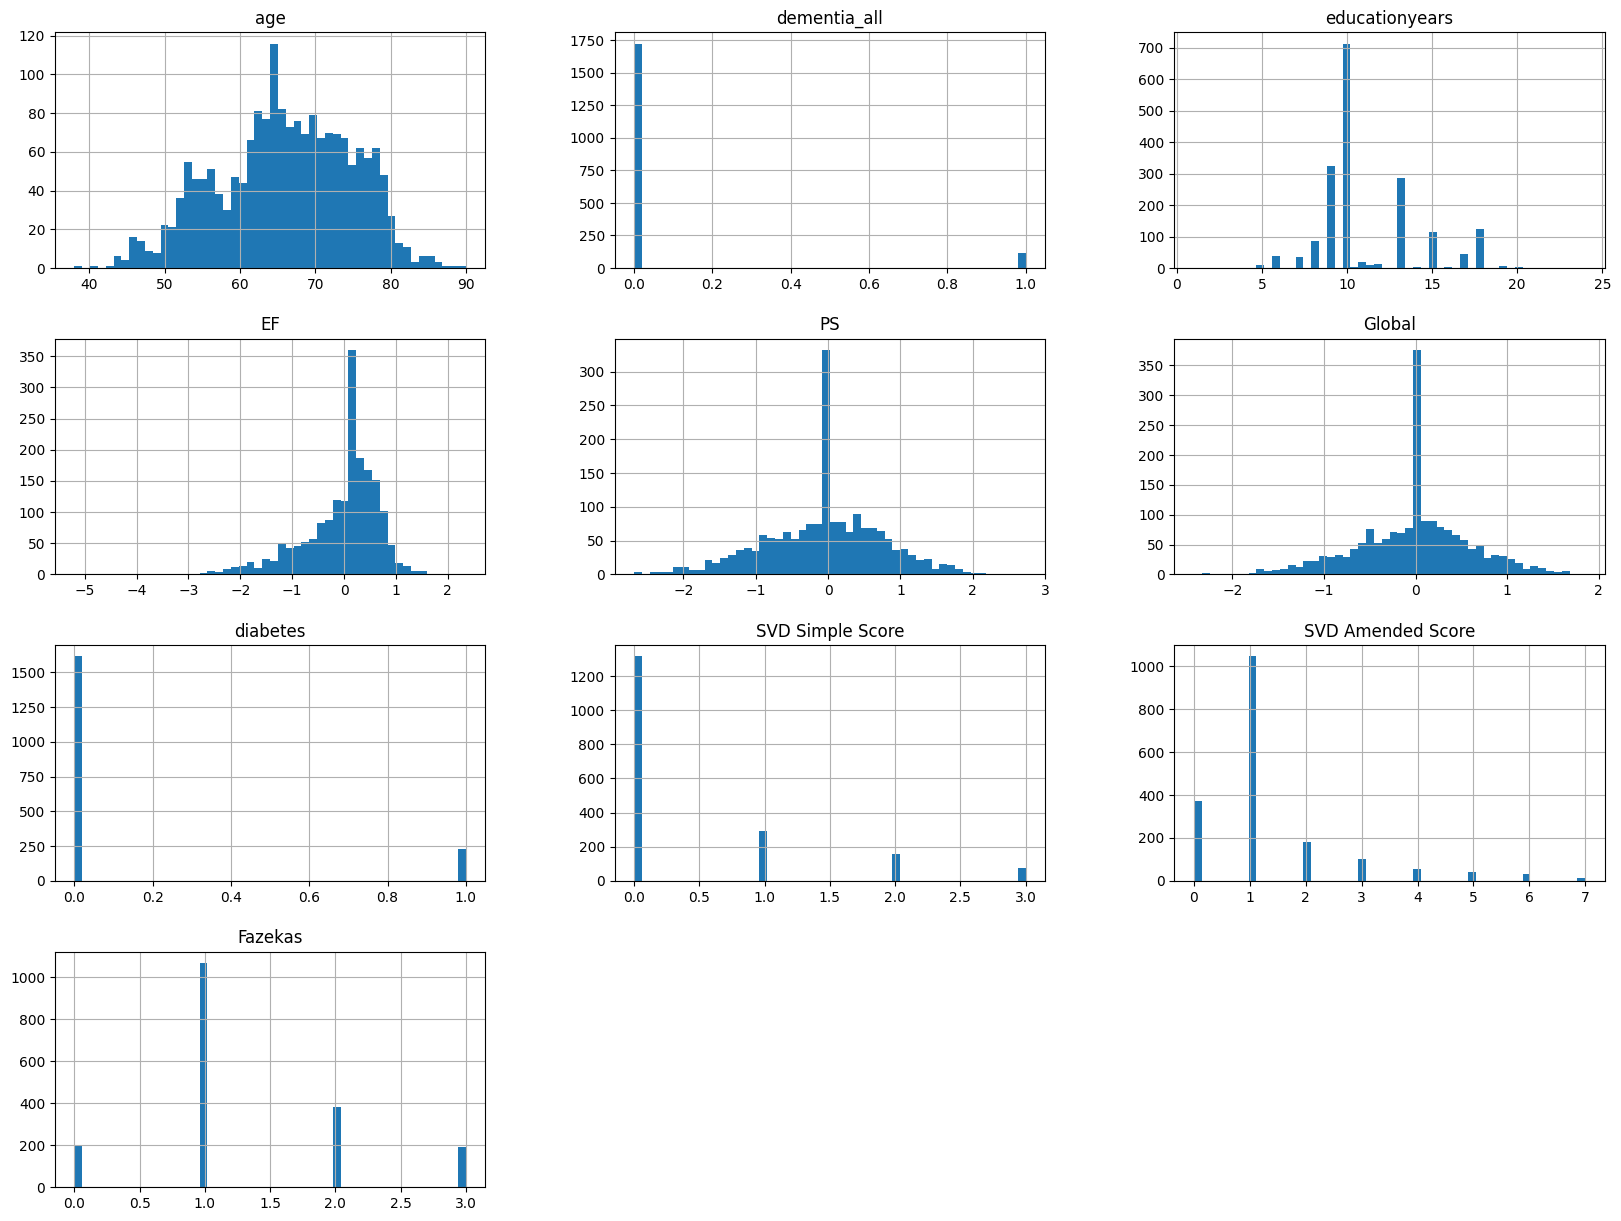

In [ ]:
# visualizing the numerical columns
#histogram for each numerical columns
di.hist(bins=50, figsize=(20,15))
plt.show()

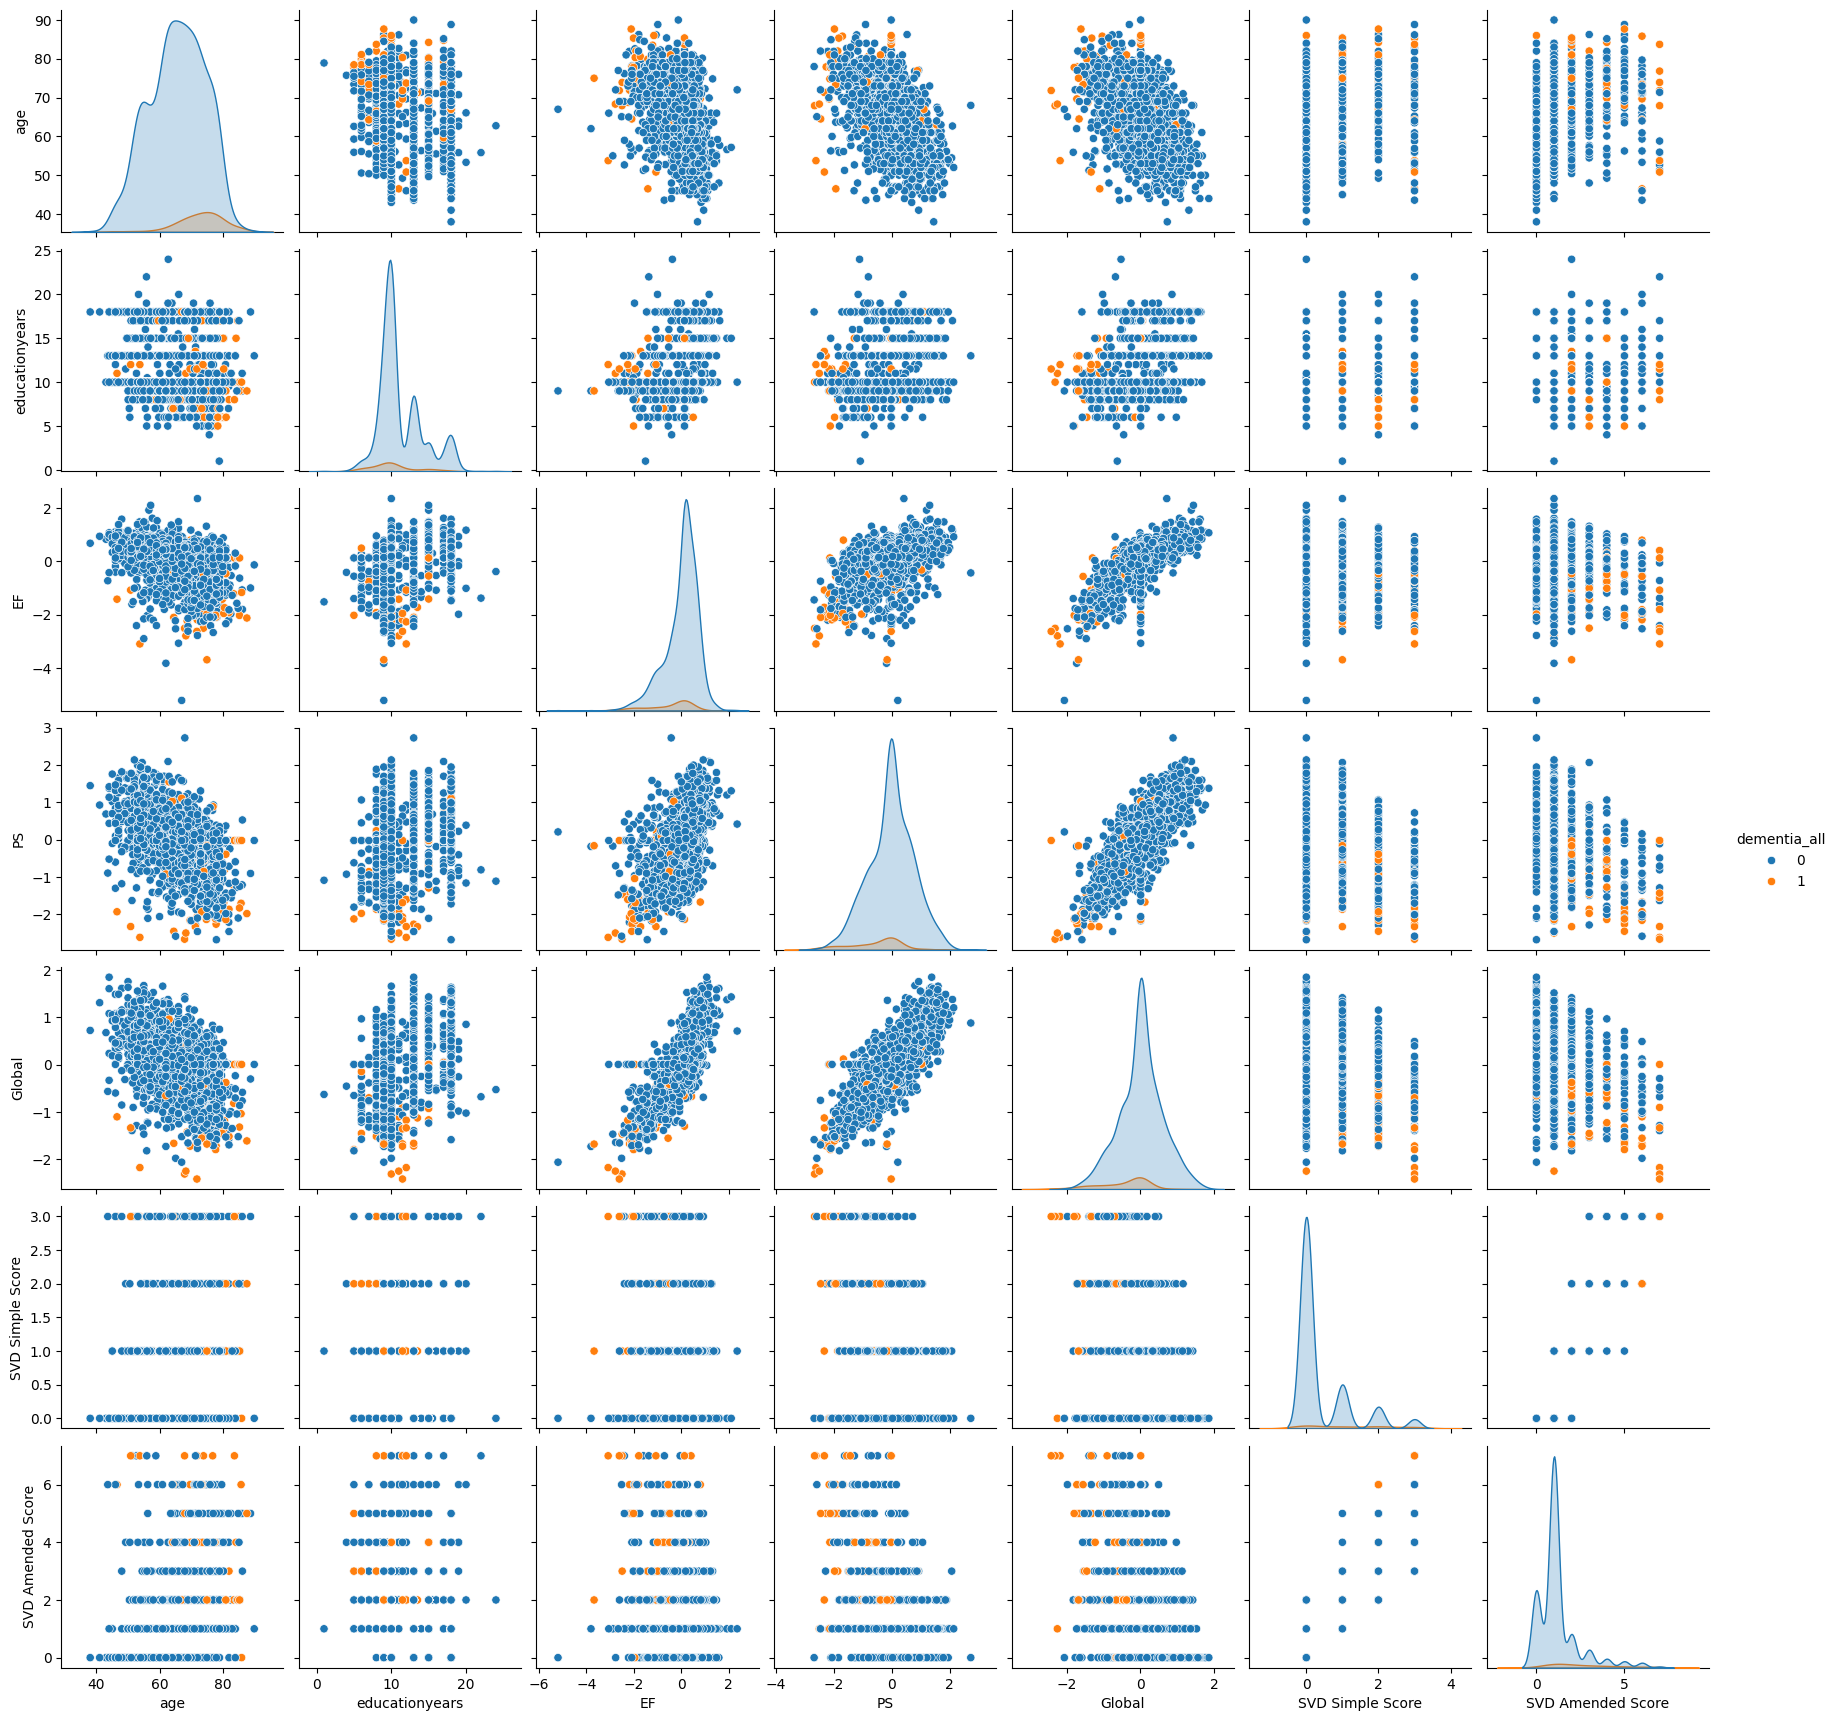

In [ ]:
#Pairplot
nums = ["age", "educationyears", "EF", "PS", "Global", "SVD Simple Score", "SVD Amended Score"]
sns.pairplot(di, vars=nums, hue="dementia_all")
plt.show()

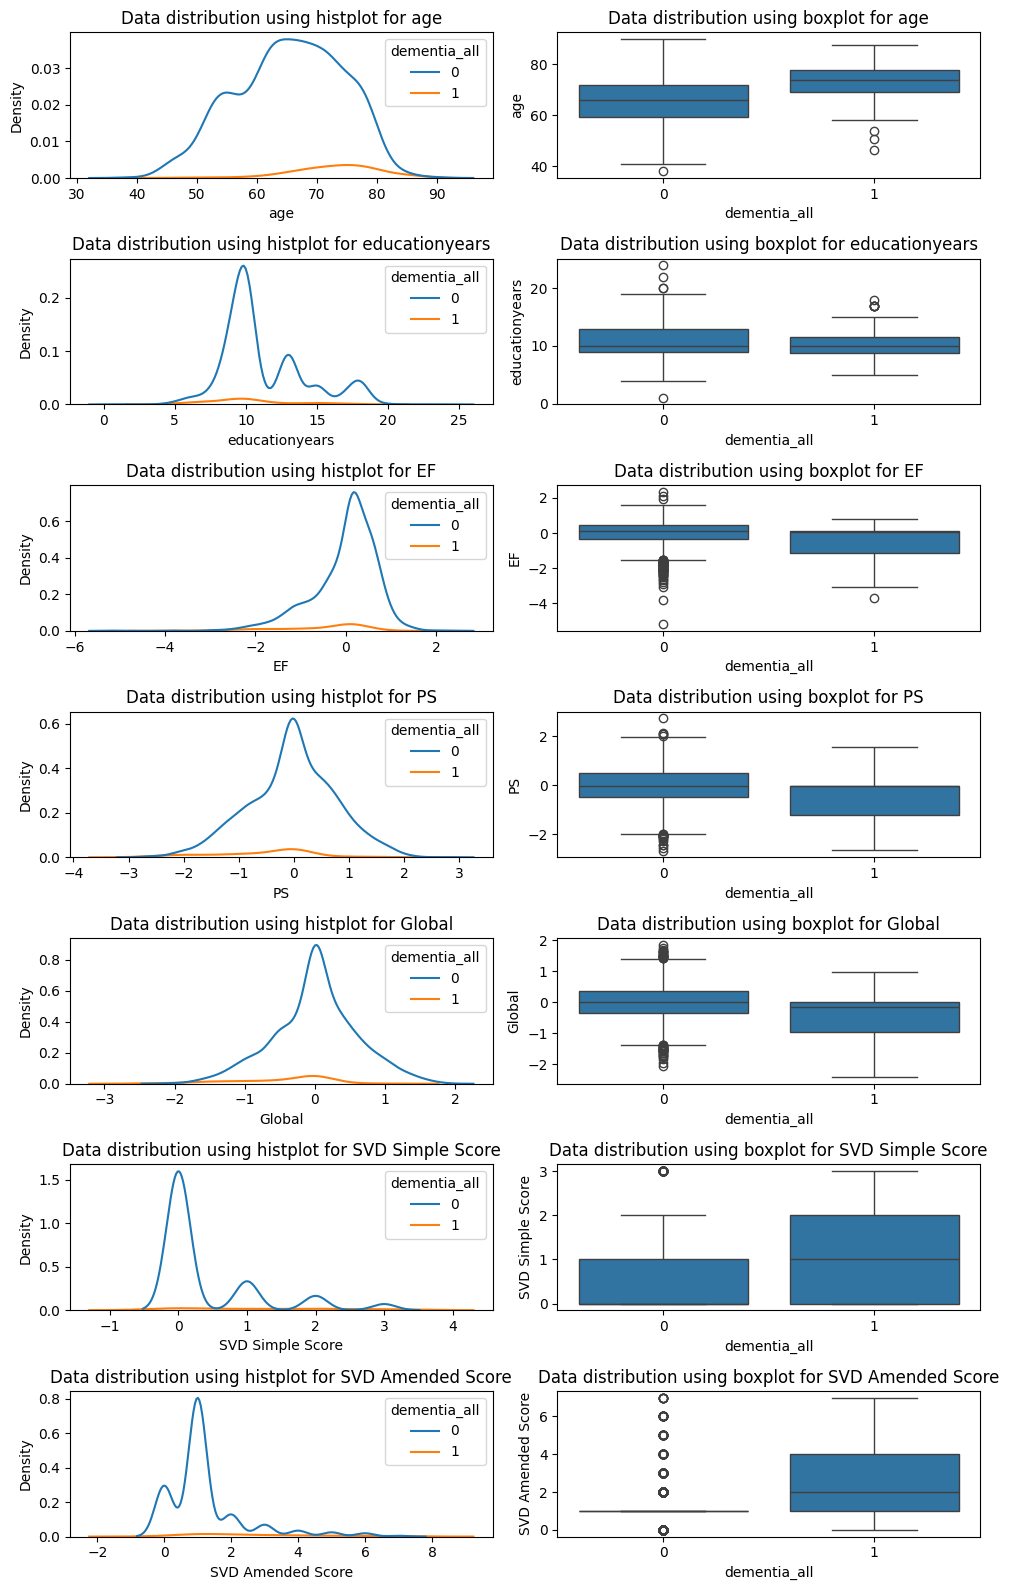

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 16))
for i, j in enumerate(nums):
    sns.kdeplot(di, x=j, hue="dementia_all", ax=axes[i][0])
    sns.boxplot(di, x="dementia_all", y=j, ax=axes[i][1])
    axes[i][0].set_title("Data distribution using histplot for " + str(j))
    axes[i][1].set_title("Data distribution using boxplot for " + str(j))
    
plt.tight_layout()
plt.show()

# BIVARIATE ANALYSIS

An analysis of the features against the target variable was also generated in order to understand the relationship between all the indicators and the target variable dementia_all and it was obvious that there was a direct relationship between some indicators and the target variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
categoricals = ["gender", "smoking", "hypertension", "hypercholesterolemia", "lacunes_num",
               "fazekas_cat", "study", "lac_count", "CMB_count"]

le = LabelEncoder()
for i in categoricals:
    di[i] = le.fit_transform(di[i])

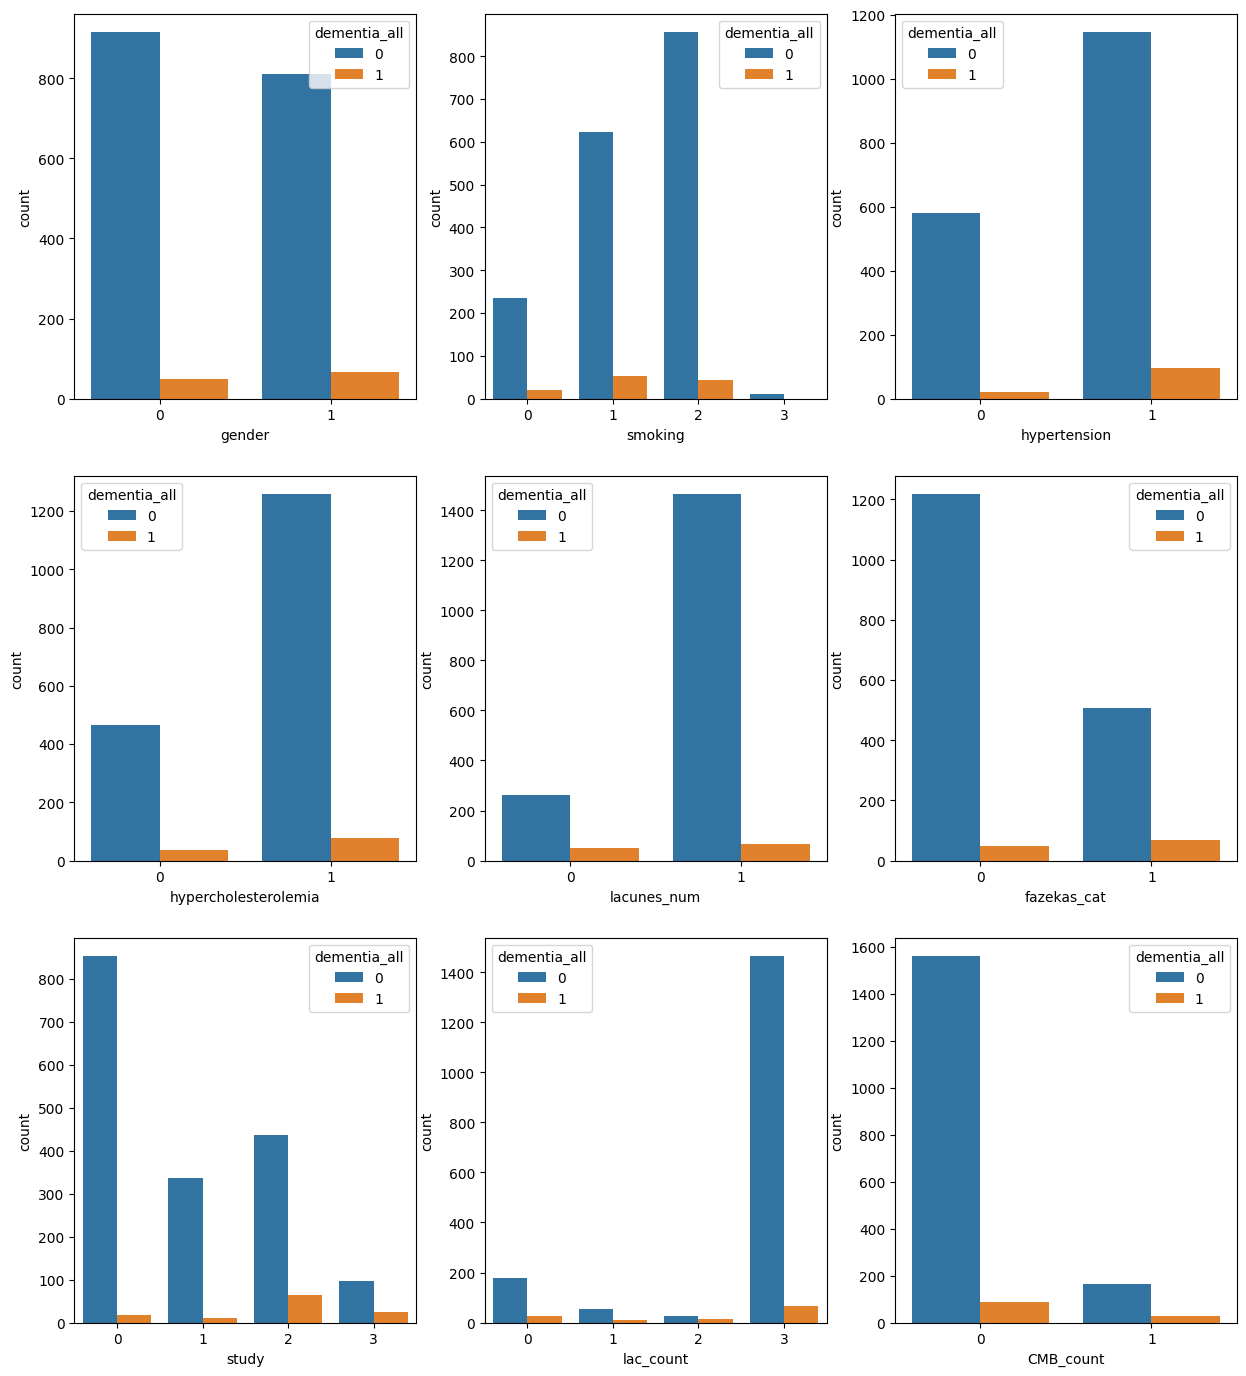

In [ ]:
# Visualizing the categorical columns
categoricals =  ["gender", "smoking", "hypertension", "hypercholesterolemia", "lacunes_num",
               "fazekas_cat", "study", "lac_count", "CMB_count"]

fig, ax = plt.subplots(3, 3, figsize = (15, 17))
for i, col in enumerate(categoricals):
    sns.countplot(x=col, data=di, ax=ax[i // 3, i % 3], hue = "dementia_all")
plt.show()

A correlation heatmap was also generated in order to understand the correlation that exists between the numerical columns in the dataset, and this showed how closely related these numerical columns are to different outcomes for imbalanced and balanced dementia_all outcome

In [ ]:
#Undersampling the target variable wich is Heart Disease
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = di['dementia_all'] # target variable

# Separate majority and minority classes
majority_class = di[y == 0]
minority_class = di[y == 1]

# Undersample majority class
undersampled_majority = resample(majority_class,
                                 replace=False, # sampling without replacement
                                 n_samples=len(minority_class), # set the number of samples to match the minority class
                                 random_state=42) # for reproducibility

# Combine minority class and undersampled majority class
undersampled_di = pd.concat([minority_class, undersampled_majority])

# Shuffle the data
undersampled_di = undersampled_di.sample(frac=1, random_state=42)

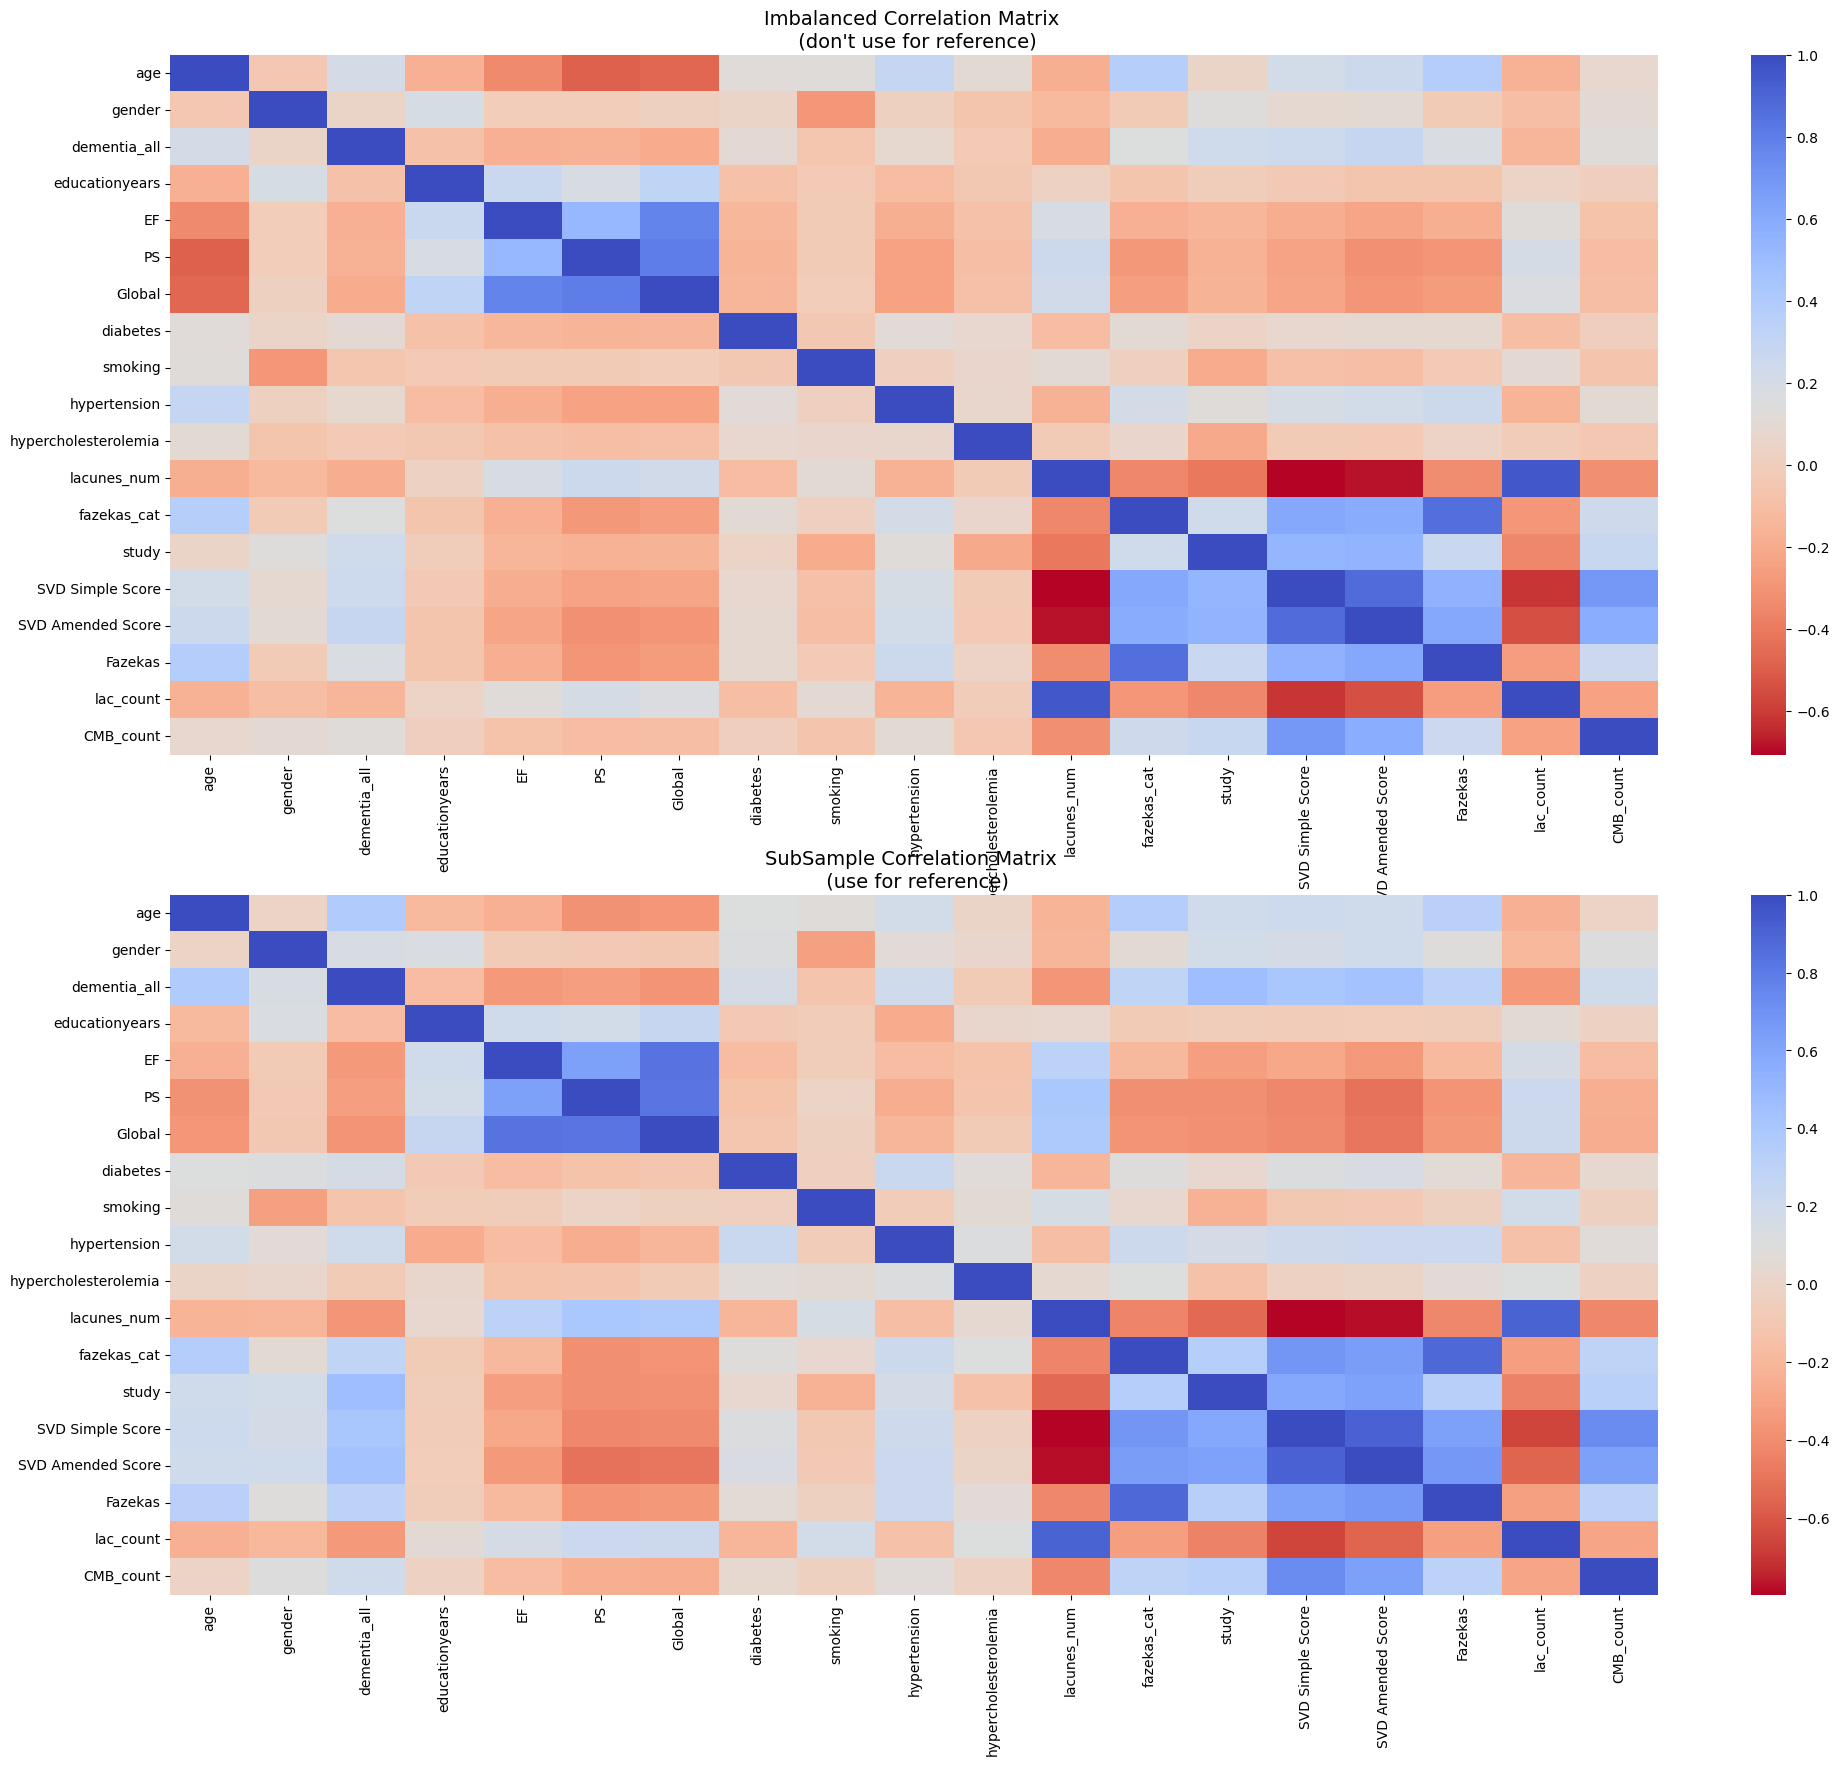

In [ ]:
# Make sure we use the subsample in our correlation
#Plotting the correlation matrix for the numerical columns
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = di.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sub_sample_corr = undersampled_di.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

# FEATURE ENGINEERING

Encoding was used to convert the categorical variables into numerical variable in preparation for the implementation of the various models. 

In [ ]:
di

age  gender  dementia_all  educationyears        EF        PS  \
0     52.67       1             0            11.0 -2.403333 -1.290000   
1     64.58       1             0            10.0  1.280000  0.360000   
2     74.92       1             0             8.0 -1.440000 -1.520000   
3     74.83       1             1             9.0  0.130000 -2.136271   
4     79.25       1             0            10.0 -0.920000 -1.493333   
...     ...     ...           ...             ...       ...       ...   
1837  67.00       0             0            13.0 -0.100000 -0.020000   
1838  71.00       0             0            13.0 -0.370000 -1.060000   
1839  55.00       1             0            10.0  0.460000  0.960000   
1840  54.00       1             0            10.0  0.190000  0.030000   
1841  68.00       0             0            10.0  0.510000 -0.530000   

        Global  diabetes  smoking  hypertension  hypercholesterolemia  \
0    -1.287000         0        0             1                     1   
1     0.744000         0        1             1                     1   
2    -0.922000         0        2             1                     1   
3    -1.301102         0        0             1                     1   
4    -0.924000         0        1             1                     1   
...        ...       ...      ...           ...                   ...   
1837 -0.260000         0        2             1                     1   
1838 -1.003333         0        2             1                     1   
1839  0.610000         0        1             0                     1   
1840  0.590000         0        1             0                     1   
1841 -0.100000         0        1             1                     1   

      lacunes_num  fazekas_cat  study  SVD Simple Score  SVD Amended Score  \
0               0            1      3               3.0                7.0   
1               0            0      3               2.0                3.0   
2               0            0      3               1.0                2.0   
3               0            1      3               2.0                4.0   
4               0            1      3               2.0                3.0   
...           ...          ...    ...               ...                ...   
1837            1            0      0               0.0                1.0   
1838            1            0      0               0.0                1.0   
1839            1            0      0               0.0                0.0   
1840            1            0      0               0.0                0.0   
1841            0            1      0               0.0                1.0   

      Fazekas  lac_count  CMB_count  
0           3          2          1  
1           1          0          1  
2           1          0          0  
3           2          1          0  
4           2          0          0  
...       ...        ...        ...  
1837        0          3          0  
1838        1          3          0  
1839        0          3          0  
1840        1          3          0  
1841        2          0          0  

[1842 rows x 19 columns]

The dataset was now split into training and testing sets by importing the ‘train_test_split’ library. The test size parameter was then set to ‘0.2’, that is 20% of the data being used for the testing set and 80% being used for the training set.

In [ ]:
pip install scikit-learn



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,f1_score

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\ELITEBOOK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
#Splitting the data to Train and Test
#Splitting into training set and test set
#80% training and 20% test
from sklearn.model_selection import train_test_split,KFold
x = di.drop('dementia_all', axis = 1)#features
y = di['dementia_all']#target variable
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)

Scaling the numerical features was required to produce good results because some of the algorithms used for this project, that is logistic regression requires data scaling to function properly without noisy data and to produce excellent results.

In [ ]:
#standardizing the data using Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

x_train_scaler = pd.DataFrame(x_train_scaler, columns=x.columns)
x_test_scaler = pd.DataFrame(x_test_scaler, columns=x.columns)
display(x_train_scaler.head())
display(x_test_scaler.head())

age    gender  educationyears        EF        PS    Global  diabetes  \
0 -2.018237 -0.933630       -0.378507  0.113630 -0.151331 -0.165541 -0.371928   
1 -0.444013 -0.933630       -0.378507  0.370113 -0.201108  0.511899 -0.371928   
2 -1.444700 -0.933630        1.291277  0.954368  1.033125  0.589016 -0.371928   
3  0.699520 -0.933630       -1.046421  0.235122  0.047778  0.049519 -0.371928   
4  0.852833  1.071088       -1.046421 -1.515503 -1.070182 -1.139849 -0.371928   

    smoking  hypertension  hypercholesterolemia  lacunes_num  fazekas_cat  \
0 -1.877987      0.709268              0.624198     0.444478    -0.672802   
1  0.886905     -1.409904             -1.602057     0.444478    -0.672802   
2 -0.495541     -1.409904              0.624198     0.444478    -0.672802   
3  0.886905      0.709268              0.624198    -2.249829    -0.672802   
4 -0.495541      0.709268              0.624198     0.444478     1.486321   

      study  SVD Simple Score  SVD Amended Score   Fazekas  lac_count  \
0  0.063263         -0.560269          -1.001461 -1.634964   0.425409   
1 -0.938736         -0.560269          -0.233153 -0.388431   0.425409   
2  1.065262         -0.560269          -0.233153 -0.388431   0.425409   
3  1.065262          0.675175           0.535156 -0.388431  -2.616473   
4  1.065262          0.675175           1.303464  2.104635   0.425409   

   CMB_count  
0  -0.340454  
1  -0.340454  
2  -0.340454  
3  -0.340454  
4  -0.340454

age    gender  educationyears        EF        PS    Global  diabetes  \
0  0.230655  1.071088        2.293148  0.383613 -1.694425 -0.622544 -0.371928   
1  1.467545 -0.933630        2.293148 -0.399336 -1.159320 -0.746203 -0.371928   
2 -0.668902  1.071088       -0.712464  0.721091  1.093100  1.248480 -0.371928   
3 -0.781346 -0.933630       -0.378507  0.586099  0.632661  1.528058 -0.371928   
4 -0.228119  1.071088        2.627105  0.046135  0.354738  0.562975 -0.371928   

    smoking  hypertension  hypercholesterolemia  lacunes_num  fazekas_cat  \
0  0.886905     -1.409904             -1.602057     0.444478    -0.672802   
1  0.886905      0.709268              0.624198    -2.249829     1.486321   
2 -0.495541     -1.409904              0.624198     0.444478    -0.672802   
3  0.886905      0.709268              0.624198     0.444478    -0.672802   
4 -0.495541      0.709268              0.624198    -2.249829     1.486321   

      study  SVD Simple Score  SVD Amended Score   Fazekas  lac_count  \
0 -0.938736         -0.560269          -0.233153 -0.388431   0.425409   
1 -0.938736         -0.560269          -0.233153  2.104635  -1.602512   
2 -0.938736          0.675175          -0.233153 -0.388431   0.425409   
3 -0.938736         -0.560269          -1.001461 -1.634964   0.425409   
4  2.067261          0.675175           2.071772  0.858102  -1.602512   

   CMB_count  
0  -0.340454  
1  -0.340454  
2   2.937252  
3  -0.340454  
4  -0.340454

After scaling the dataset, the shape of the train and test set was printed in order to get an overview of the dataset.

In [ ]:
# checking the shape of the train and test datasets

print("The shape of x_train_scaler is: ",x_train_scaler.shape)
print("The shape of x_test_scaler is: ",x_test_scaler.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train_scaler is:  (1473, 18)
The shape of x_test_scaler is:  (369, 18)
The shape of y_train is:  (1473,)
The shape of y_test is:  (369,)


The baseline model was also created to serve as a point of reference for the performance other models that they will also be trained on the train and test set.

In [ ]:
from sklearn.dummy import DummyClassifier
base = DummyClassifier(strategy = "constant", constant = 0)
base.fit(x_train_scaler, y_train)
y_pred_base = base.predict(x_test_scaler)

print(f"Your baseline model achieves accuracy = {accuracy_score(y_test, y_pred_base)}")
print(f"Your baseline model achieves f1 = {f1_score(y_test, y_pred_base)}")
print(f"Your baseline model achieves roc_auc = {roc_auc_score(y_test, y_pred_base)}")

Your baseline model achieves accuracy = 0.943089430894309
Your baseline model achieves f1 = 0.0
Your baseline model achieves roc_auc = 0.5


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# Create a dictionary to store the classifiers
classifiers = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gaussian Naive Bayes': gnb
}

In [ ]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    training_score = cross_val_score(classifier, x_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 93.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 85.0 % accuracy score


In [ ]:
# Overfitting Case

log_reg_score = cross_val_score(lr, x_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


dt_score = cross_val_score(dt, x_train, y_train, cv=5)
print('DecisionTreeClassifier Cross Validation Score', round(dt_score.mean() * 100, 2).astype(str) + '%')

rf_score = cross_val_score(rf, x_train, y_train, cv=5)
print('RandomForestClassifier Cross Validation Score', round(rf_score.mean() * 100, 2).astype(str) + '%')

gnb_score = cross_val_score(gnb, x_train, y_train, cv=5)
print('GaussianNB Cross Validation Score', round(gnb_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  92.94%
DecisionTreeClassifier Cross Validation Score 89.0%
RandomForestClassifier Cross Validation Score 93.28%
GaussianNB Cross Validation Score 84.86%


# MODEL IMPLEMENTATION

The models were then implemented and the were run on both the training and testing set, with their training and testing accuracy visualised with a horizontal bar chart. 

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()

model_list = [lr,dt,rf,gnb]

train_acc = []
test_acc = []

for i in model_list:
    i_model = i.fit(x_train_scaler,y_train)
    y_train_pred = i_model.predict(x_train_scaler)
    y_test_pred = i_model.predict(x_test_scaler)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))

The performance of the classification models was compared using evaluation metrics such as precision, accuracy, f1-score and the predicted values for both the training and testing set using the confusion matrix and a classification report shown in the code below. A confusion matrix was generated for both training and testing set, plotting the false and true positives as well as the false and true negatives.

In [ ]:
from sklearn.metrics import classification_report

# Create a dictionary to store the classifiers
classifiers = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gaussian Naive Bayes': gnb
}

# Loop through the classifiers and display the classification report
for name, clf in classifiers.items():
    print('Classification Report for', name)
    y_pred = clf.predict(x_test_scaler)
    print(classification_report(y_test, y_pred))
    models = [lr, dt, rf, gnb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes']

for i, model in enumerate(models):
    y_pred = model.predict(x_test_scaler)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix - {model_names[i]}:\n{cm}\n")

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       348
           1       0.25      0.05      0.08        21

    accuracy                           0.94       369
   macro avg       0.60      0.52      0.52       369
weighted avg       0.91      0.94      0.92       369

Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       348
           1       0.05      0.05      0.05        21

    accuracy                           0.89       369
   macro avg       0.50      0.50      0.50       369
weighted avg       0.89      0.89      0.89       369

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       348
           1       0.50      0.10      0.16        21

    accuracy                           0.94       369
  

In [ ]:
models = ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Gaussian Naive Bayes']

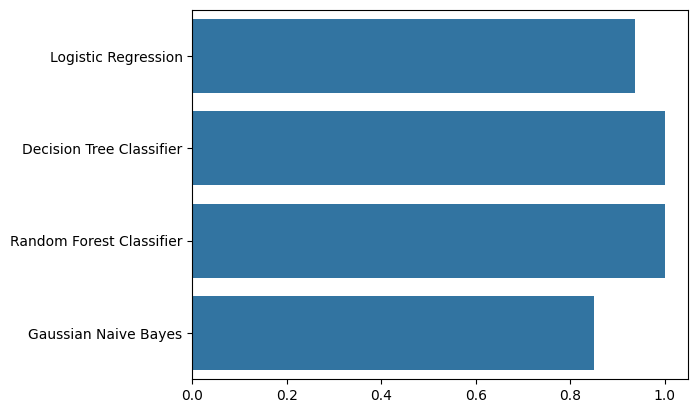

In [ ]:
#visualizing the train model accuracy 

sns.barplot(y=models,x=train_acc)
plt.show()

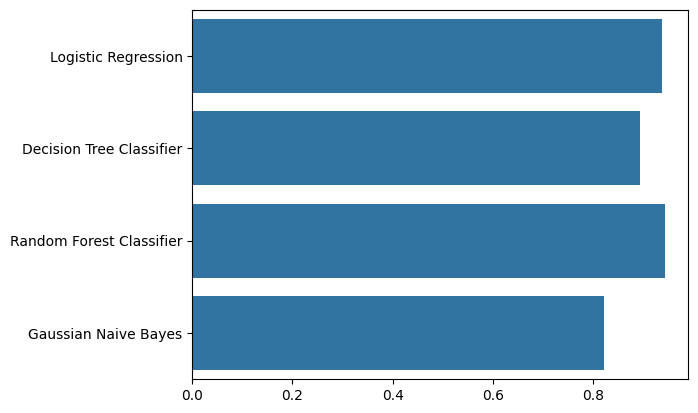

In [ ]:
# visualizing the test model accuracy 


sns.barplot(y=models,x=test_acc)
plt.show()

A summary of the training and testing accuracies were also printed and visualised showing the accuracies of all the models with random forest classifier and logistic regression being the better performing models.

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()


model_dict = {'Model':model_list,'Train Score':train_acc,'Test Score':test_acc}
model_dict

{'Model': [LogisticRegression(),
  DecisionTreeClassifier(),
  RandomForestClassifier(),
  GaussianNB()],
 'Train Score': [0.9382213170400543, 1.0, 1.0, 0.8499660556687033],
 'Test Score': [0.9376693766937669,
  0.8943089430894309,
  0.943089430894309,
  0.8211382113821138]}

In [ ]:
model_summary = pd.DataFrame({'Model':model_names,'Train Score':train_acc,'Test Score':test_acc})
model_summary

Model  Train Score  Test Score
0   Logistic Regression     0.938221    0.937669
1         Decision Tree     1.000000    0.894309
2         Random Forest     1.000000    0.943089
3  Gaussian Naive Bayes     0.849966    0.821138

A ROC curve was also generated and displayed in a single plot displaying the false positive and true positive rates in the curve using the actual test labels, that is the ‘y_test’ and the predicted probabilities ‘y_pred_prob’ as inputs for the curve.

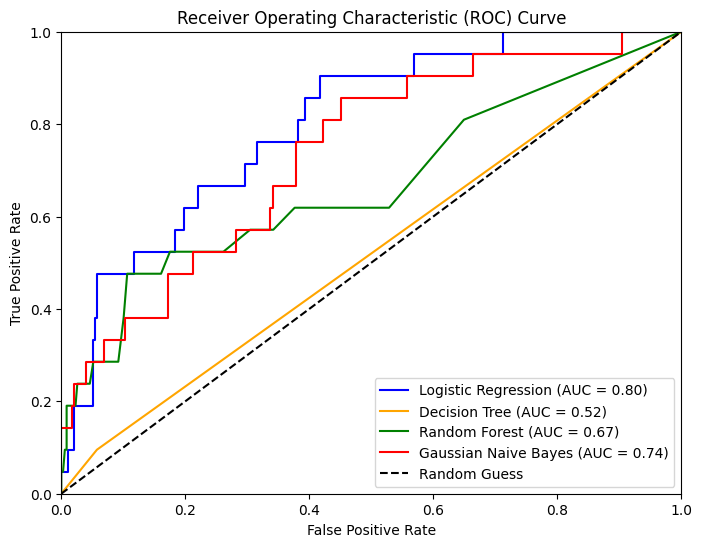

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

model_list = [lr, dt, rf, gnb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes']
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(x_train_scaler, y_train)
    y_pred_prob = model.predict_proba(x_test_scaler)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# MODEL PERFORMANCE ENHANCEMENT

In order to improve the performance of the models, performance enhancement techniques such as undersampling and Oversampling, Stratified K cross validation as well as hyperparameter tuning were employed so as to address the issue of imbalance in the target variable as well in improve on the performance of the models.

# APPLYING UNDERSAMPLING TECHNIQUE 

Undersampling was applied to the target variable in order to avoid bias in the predictions of the models.The shape of the undersampled set was also printed to get an overview of the resampled set.

In [ ]:

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = di['dementia_all'] # target variable

# Separate majority and minority classes
majority_class = di[y == 0]
minority_class = di[y == 1]

# Undersample majority class
undersampled_majority = resample(majority_class,
                                 replace=False, # sampling without replacement
                                 n_samples=len(minority_class), # set the number of samples to match the minority class
                                 random_state=42) # for reproducibility

# Combine minority class and undersampled majority class
undersampled_di = pd.concat([minority_class, undersampled_majority])

# Shuffle the data
undersampled_di = undersampled_di.sample(frac=1, random_state=42)

# Split into training and testing sets
x = undersampled_di.drop('dementia_all', axis=1) # feature variables
y = undersampled_di['dementia_all'] # target variable
x_train_scaled, x_test_scaled, y_train_resampled, y_test_resampled = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the training and testing data separately
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_scaled)
x_test_scaled = scaler.transform(x_test_scaled)

# Convert the scaled arrays to Pandas DataFrames with feature names
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x.columns)

# Print the shapes of the new datasets
print("Shape of undersampled_di:", undersampled_di.shape)
print("Shape of X_train_scaled:", x_train_scaled.shape)
print("Shape of X_test_scaled:", x_test_scaled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("Shape of y_test_resampled:", y_test_resampled.shape)


Shape of undersampled_di: (232, 19)
Shape of X_train_scaled: (185, 18)
Shape of X_test_scaled: (47, 18)
Shape of y_train_resampled: (185,)
Shape of y_test_resampled: (47,)


After undersampling was applied to the target variable, it was visualized to see the effect that undersampling had on the target variable and it was obvious that there was no issue of clas imbalance in the target variable any longer.

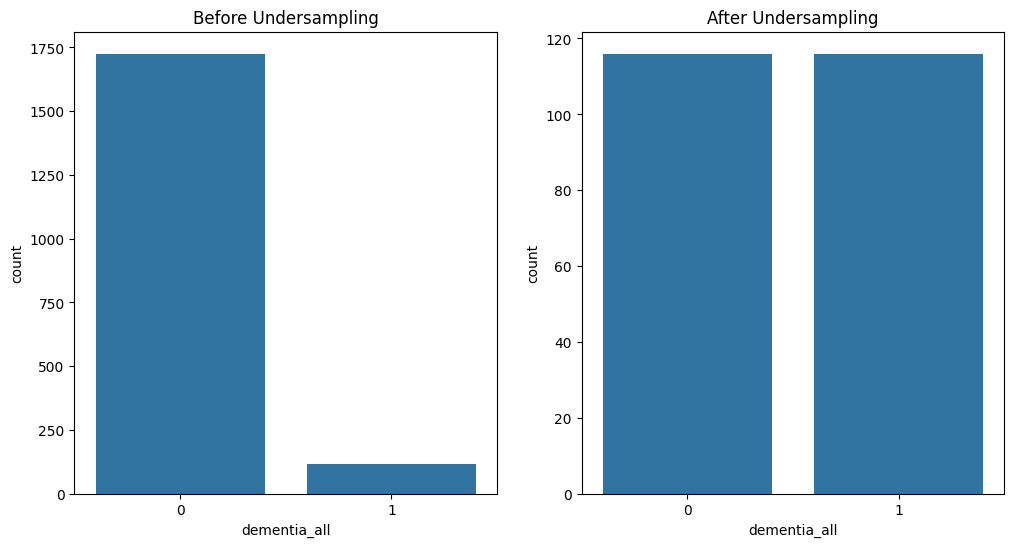

In [ ]:

# Plot distribution of target variable before and after undersampling
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
sns.countplot(data=di, x='dementia_all', ax=axs[0])
axs[0].set_title('Before Undersampling')
sns.countplot(data=undersampled_di, x='dementia_all', ax=axs[1])
axs[1].set_title('After Undersampling')
plt.show()

# APPLYING OVERSAMPLING TECHNIQUE 


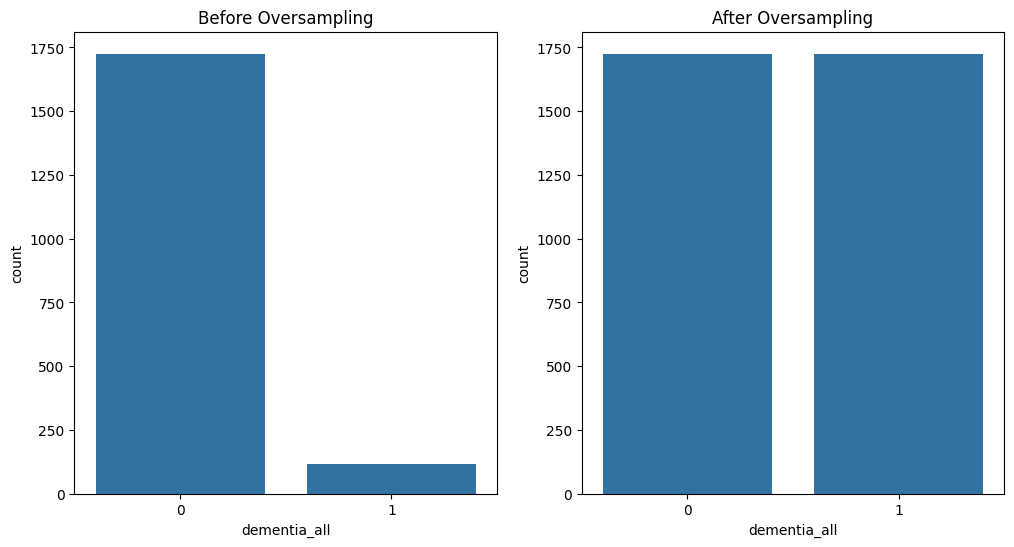

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and axes
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Plot original distribution
sns.countplot(data=di, x='dementia_all', ax=axs[0])
axs[0].set_title('Before Oversampling')

# Separate majority and minority classes 
y = di['dementia_all']
majority_class = di[y == 0]
minority_class = di[y == 1]

# Oversample minority class
minority_oversampled = resample(minority_class,  
                                 replace=True,
                                 n_samples=len(majority_class),
                                 random_state=42)

# Combine original majority class with oversampled minority class
oversampled_di = pd.concat([majority_class, minority_oversampled])

# Plot distribution after oversampling  
sns.countplot(data=oversampled_di, x='dementia_all', ax=axs[1])
axs[1].set_title('After Oversampling')

# Show plot
plt.show()

In [ ]:
# Assuming you have already imported the necessary libraries and performed oversampling

# Save oversampled data to CSV
oversampled_di.to_csv('oversampled_data.csv', index=False)


In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Create a list of models
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GaussianNB(),
    LogisticRegression(random_state=42)
]

# Perform k-fold cross-validation with k=5 for each model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model in models:
    cv_results = cross_val_score(model, x_train_scaled, y_train_resampled, cv=kf)
    print(f"Accuracy for {model.__class__.__name__}: {cv_results}")
    print(f"Average accuracy for {model.__class__.__name__}: {cv_results.mean()}\n")


Accuracy for DecisionTreeClassifier: [0.64864865 0.64864865 0.78378378 0.59459459 0.59459459]
Average accuracy for DecisionTreeClassifier: 0.6540540540540541

Accuracy for RandomForestClassifier: [0.7027027  0.7027027  0.75675676 0.62162162 0.72972973]
Average accuracy for RandomForestClassifier: 0.7027027027027027

Accuracy for GaussianNB: [0.64864865 0.81081081 0.78378378 0.62162162 0.64864865]
Average accuracy for GaussianNB: 0.7027027027027027

Accuracy for LogisticRegression: [0.72972973 0.7027027  0.72972973 0.64864865 0.75675676]
Average accuracy for LogisticRegression: 0.7135135135135136



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Define the hyperparameter search space for each model
dt_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

gnb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Instantiate each model
dt = DecisionTreeClassifier(random_state=32)
lr = LogisticRegression(random_state=32)
rf = RandomForestClassifier(random_state=32)
gnb = GaussianNB()

APPLYING STRATIFIED K-FOLD CROSS VALIDATION

Stratified K-fold cross validation was performed with on all the models. The ‘StratifiedKFold’ function was used in order to make sure that every fold contained the same proportion for each class just like the original dataset. The cross-validation results which are used to compare the testing accuracy for every model is displayed using a ‘boxplot’ printing out the training accuracy as well as the evaluation metrics for each model.




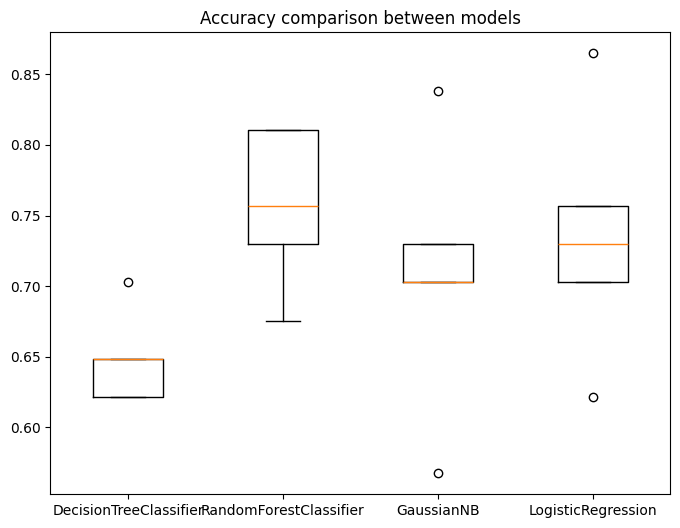

Training Accuracy for DecisionTreeClassifier: 1.000
Evaluation metrics for DecisionTreeClassifier:
Accuracy: 0.649
Precision: 0.654
Recall: 0.650
F1-score: 0.646
ROC AUC: 0.650

Training Accuracy for RandomForestClassifier: 1.000
Evaluation metrics for RandomForestClassifier:
Accuracy: 0.757
Precision: 0.762
Recall: 0.757
F1-score: 0.756
ROC AUC: 0.789

Training Accuracy for GaussianNB: 0.711
Evaluation metrics for GaussianNB:
Accuracy: 0.708
Precision: 0.725
Recall: 0.707
F1-score: 0.702
ROC AUC: 0.792

Training Accuracy for LogisticRegression: 0.780
Evaluation metrics for LogisticRegression:
Accuracy: 0.735
Precision: 0.740
Recall: 0.735
F1-score: 0.733
ROC AUC: 0.796



In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Create a list of models
models = [
    DecisionTreeClassifier(random_state=32),
    RandomForestClassifier(random_state=32),
    GaussianNB(),
    LogisticRegression(random_state=32, max_iter=1000)
]

# Perform Stratified k-fold cross-validation with k=5 for each model
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=32)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro',
    'roc_auc': 'roc_auc'
}
results = {}
for model in models:
    cv_results = cross_validate(model, x_train_scaled, y_train_resampled, cv=skf, scoring=scoring, return_train_score=True) # add return_train_score=True
    results[model.__class__.__name__] = cv_results

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot([results[model.__class__.__name__]['test_accuracy'] for model in models], labels=[model.__class__.__name__ for model in models])
ax.set_title('Accuracy comparison between models')
plt.show()

# Print the evaluation metrics
for model_name, model_results in results.items():
    print(f"Training Accuracy for {model_name}: {model_results['train_accuracy'].mean():.3f}")
    print(f"Evaluation metrics for {model_name}:")
    print(f"Accuracy: {model_results['test_accuracy'].mean():.3f}")
    print(f"Precision: {model_results['test_precision'].mean():.3f}")
    print(f"Recall: {model_results['test_recall'].mean():.3f}")
    print(f"F1-score: {model_results['test_f1'].mean():.3f}")
    print(f"ROC AUC: {model_results['test_roc_auc'].mean():.3f}\n")


A confusion matrix is generated for the models based on the resampled training set and the testing set which displays the true positive, false positive, true negative and false negative of the actual labels in the rows and the predicted labels in the columns.

In [ ]:
from sklearn.metrics import confusion_matrix

for model_name, model_results in results.items():
    model = next(filter(lambda m: m.__class__.__name__ == model_name, models))
    y_pred = model.fit(x_train_scaled, y_train_resampled).predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix for {model_name}:")
    print(cm)
    print()

Confusion matrix for DecisionTreeClassifier:
[[142 206]
 [ 14   7]]

Confusion matrix for RandomForestClassifier:
[[ 95 253]
 [  3  18]]

Confusion matrix for GaussianNB:
[[348   0]
 [ 21   0]]

Confusion matrix for LogisticRegression:
[[  0 348]
 [  0  21]]



The performance of models was summarised together with their training and testing accuracy and printed out for the sake of comparative analysis.

In [ ]:
import pandas as pd

# Create a dictionary to store the results
accuracy_results = {'Model': [], 'Training Accuracy': [], 'Testing Accuracy': []}

# Iterate through each model and store the accuracy results
for model_name, model_results in results.items():
    accuracy_results['Model'].append(model_name)
    accuracy_results['Training Accuracy'].append(model_results['train_accuracy'].mean())
    accuracy_results['Testing Accuracy'].append(model_results['test_accuracy'].mean())

# Create a pandas dataframe from the accuracy results dictionary
accuracy_df = pd.DataFrame.from_dict(accuracy_results)

# Print the accuracy dataframe
print(accuracy_df)


                    Model  Training Accuracy  Testing Accuracy
0  DecisionTreeClassifier           1.000000          0.648649
1  RandomForestClassifier           1.000000          0.756757
2              GaussianNB           0.710811          0.708108
3      LogisticRegression           0.779730          0.735135


The training and testing accuracy of all the models was then visualized in a clustered bar chart to show a comparison of the accuracy of both resampled training set and testing set. And an observation drawn from this visualization is that GaussianNB and LogisticRegression were the model that performed better on both the resampled training set and the testing set as well.

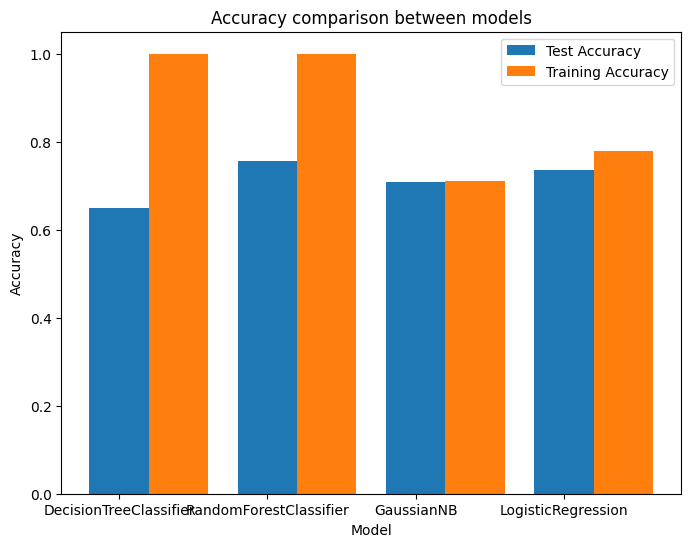

In [ ]:
import matplotlib.pyplot as plt

# Extract the test accuracies for each model
test_accuracies = [results[model_name]['test_accuracy'].mean() for model_name in results]

# Extract the training accuracies for each model
train_accuracies = [results[model_name]['train_accuracy'].mean() for model_name in results]

# Create a bar chart to visualize the accuracies
fig, ax = plt.subplots(figsize=(8,6))
x_pos = [i for i in range(len(models))]
ax.bar(x_pos, test_accuracies, width=0.4, align='center', label='Test Accuracy')
ax.bar([i+0.4 for i in x_pos], train_accuracies, width=0.4, align='center', label='Training Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels([model.__class__.__name__ for model in models])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy comparison between models')
ax.legend()
plt.show()


Then a ROC curve was generated and displayed using the resampled training set and the testing set, with the false positive rate and the true positive rate as variables and the actual test labels and the predicted probabilities as input values

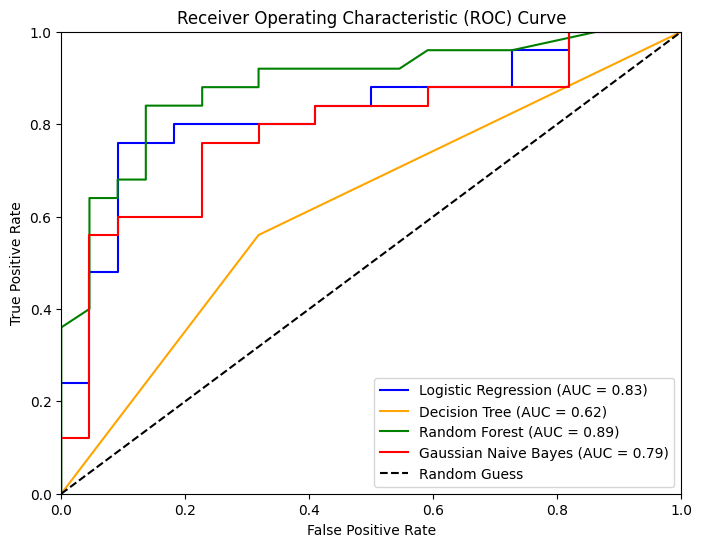

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

model_list = [lr, dt, rf, gnb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes']
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(x_train_scaled, y_train_resampled)
    y_pred_prob = model.predict_proba(x_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_prob)
    auc = roc_auc_score(y_test_resampled, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# FEATURE IMPORTANCE 

After random forest and Logistic regression were selected as the better performing models, a feature importance was generated using the random forest feature importance classifiers by displaying an array of values from 0 to 1 with a higher corresponding value indicating an important feature. This was done in order to figure out and understand the indicators that indeed play a key role in the prediction of dementia using the selected model. 

                 feature  importance
14     SVD Amended Score    0.822378
0                    age    0.701614
10           lacunes_num    0.619327
12                 study    0.604834
3                     EF   -0.516289
7                smoking   -0.420407
16             lac_count   -0.388174
11           fazekas_cat   -0.374468
6               diabetes    0.263326
15               Fazekas    0.198842
8           hypertension    0.198359
4                     PS    0.177430
2         educationyears   -0.162999
1                 gender   -0.155239
13      SVD Simple Score    0.090611
5                 Global   -0.089132
9   hypercholesterolemia    0.042946
17             CMB_count   -0.034649


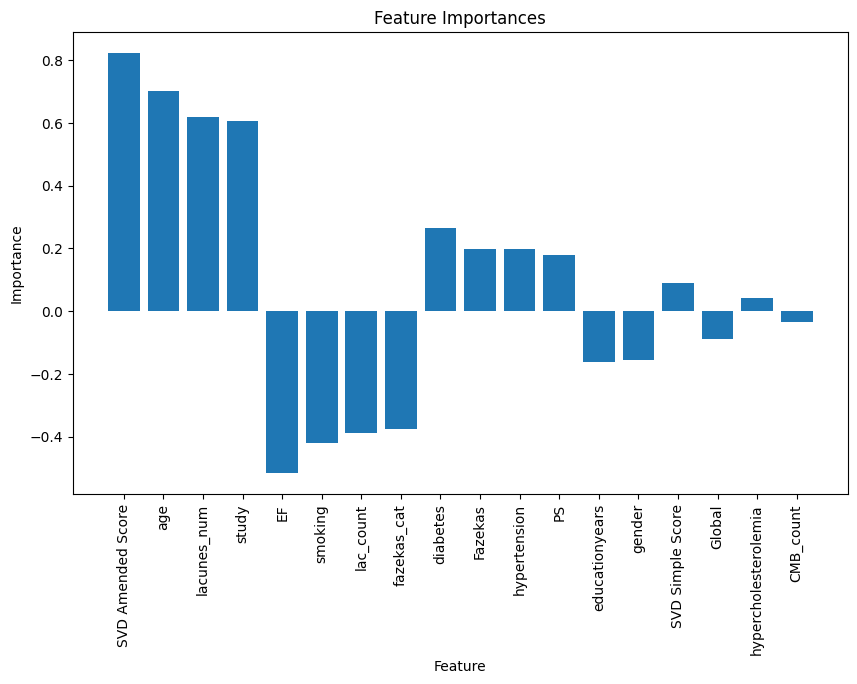

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
lr = LogisticRegression()
lr_model = lr.fit(x_train_scaled, y_train_resampled)

# Get feature coefficients
feature_importances = pd.DataFrame(
    {'feature': x_train_scaled.columns,
     'importance': lr_model.coef_[0]})

# Sort by importance (absolute value of coefficients)
feature_importances = feature_importances.sort_values('importance', ascending=False, key=abs)

# Print feature importances
print(feature_importances)

import matplotlib.pyplot as plt

# Plot importances
plt.figure(figsize=(10, 6))
plt.bar(x=feature_importances['feature'], height=feature_importances['importance'])
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [ ]:
rf=RandomForestClassifier()
rf_model=rf.fit(x_train_scaled,y_train_resampled)
feature_importances=rf_model.feature_importances_
print(feature_importances)

[0.13557327 0.01793234 0.07692257 0.11887772 0.11812961 0.11532151
 0.03767328 0.03688737 0.0192317  0.01788207 0.00642989 0.01213092
 0.09458611 0.05158882 0.08684253 0.02527261 0.01811764 0.01060002]


In [ ]:
# If you have the original DataFrame 'df'
x_columns = di.columns.tolist()
x_columns


['age',
 'gender',
 'dementia_all',
 'educationyears',
 'EF',
 'PS',
 'Global',
 'diabetes',
 'smoking',
 'hypertension',
 'hypercholesterolemia',
 'lacunes_num',
 'fazekas_cat',
 'study',
 'SVD Simple Score',
 'SVD Amended Score',
 'Fazekas',
 'lac_count',
 'CMB_count']

                 feature  importance
0                    age    0.197267
4                     PS    0.111470
5                 Global    0.111089
3                     EF    0.109823
2         educationyears    0.088375
14     SVD Amended Score    0.060571
12                 study    0.049907
7                smoking    0.044403
13      SVD Simple Score    0.038676
1                 gender    0.032677
15               Fazekas    0.029766
9   hypercholesterolemia    0.025564
6               diabetes    0.024345
16             lac_count    0.023381
8           hypertension    0.021788
17             CMB_count    0.012668
10           lacunes_num    0.009443
11           fazekas_cat    0.008788


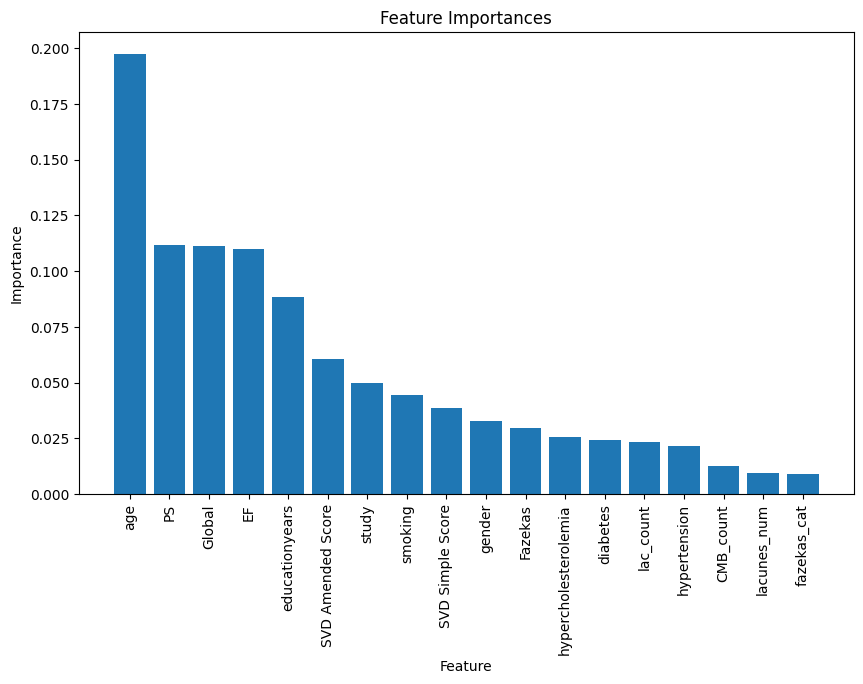

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Convert to dataframe
feature_importances = pd.DataFrame({'feature': x_train.columns, 'importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print feature importances
print(feature_importances)

import matplotlib.pyplot as plt

# Plot importances
plt.figure(figsize=(10, 6))
plt.bar(x=feature_importances['feature'], height=feature_importances['importance'])
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

# LIME



In [ ]:

!pip install lime
import lime
import lime.lime_tabular




# Split the data into training and testing sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a random forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, feature_names=x_train.columns, class_names=['non-dementia', 'dementia'])

# Choose an instance from the test set to explain (you can adjust the index as needed)
instance_idx = 0

# Explain the prediction for the chosen instance
explanation = explainer.explain_instance(x_test.iloc[instance_idx], rf.predict_proba)

# Show explanation
explanation.show_in_notebook()

  DEPRECATION: lime is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 78.3/78.3 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 24.5/24.5 MB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 6.6 MB/s eta 0:00:00
     -------------------------------------- 313.4/313.4 kB 4.9 MB/s eta 0:00:00
     -------------------------------------- 224.5/224.5 kB 6.9 MB/s eta 0:00:00
  Running setup.py install for lime: started
  Running setup.py install for lime: finished with status 'done'


# SHAP Values (SHapley Additive exPlanations) break down a prediction to show the impact of each feature.

     -------------------------------------- 453.1/453.1 kB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 8.9 MB/s eta 0:00:00
     ---------------------------------------- 28.1/28.1 MB 7.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


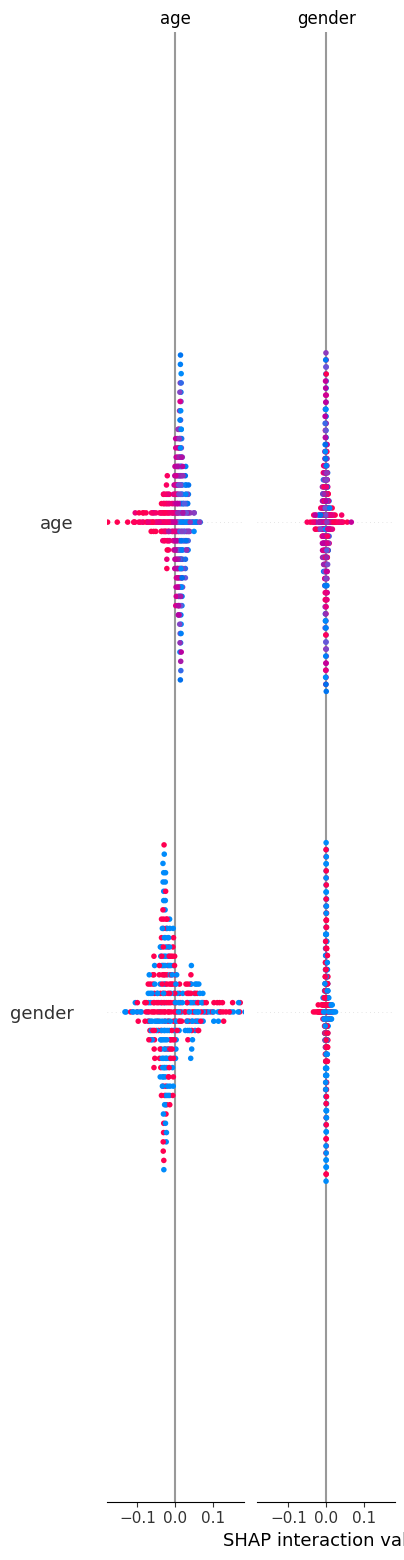

In [ ]:
!pip install shap
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Train a random forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Create a SHAP explainer object
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values
shap_values = explainer.shap_values(x_test)

# Summary plot
shap.summary_plot(shap_values, x_test, plot_type='bar', max_display=x_test.shape[1])  # Plot for each feature
plt.show()

A bar chart was plotted to display the features that are important and can be considered as key indicators in the prediction of whether or not an individual has dementia. An observation that can be drawn from the visualisation is that age...

# LOGISTIC REGRESSION USING SMOTE DATA

In [ ]:
!pip install imblearn
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
x = di.drop("dementia_all", axis=1).values
y = di.iloc[:, 2].values

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.1)
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

     -------------------------------------- 257.7/257.7 kB 7.7 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No dementia', round(oversampled_di['dementia_all'].value_counts()[0]/len(oversampled_di) * 100,2), '% of the dataset')
print('dementia', round(oversampled_di['dementia_all'].value_counts()[1]/len(oversampled_di) * 100,2), '% of the dataset')

X = oversampled_di.drop('dementia_all', axis=1)
y = oversampled_di['dementia_all']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No dementia 50.0 % of the dataset
dementia 50.0 % of the dataset
Train: [ 346  347  348 ... 3449 3450 3451] Test: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  17

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_

# Parameters
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
from sklearn.model_selection import RandomizedSearchCV 

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params)
# Removed n_iter 
pipeline = imbalanced_make_pipeline(
    LogisticRegression(), log_reg_params
)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 2762 | Length of y (train): 2762
Length of X (test): 690 | Length of y (test): 690
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.7270749796891789
precision: 0.7220295582664866
recall: 0.7755035839480982
f1: 0.7440168801421554
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Parameters
log_reg_params = {"penalty": ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

for train, test in sss.split(original_Xtrain, original_ytrain):
    
    LogisticRegression(max_iter=100)

prediction = pipeline.fit(
        original_Xtrain[train], original_ytrain[train]
    ).predict(original_Xtrain[test])
    
    # Scoring

# Calculate accuracy 

accuracy = accuracy_score(original_ytrain[test], prediction)


precision = precision_score(original_ytrain[test], prediction)
recall = recall_score(original_ytrain[test], prediction) 
f1 = f1_score(original_ytrain[test], prediction)
# Print 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7644927536231884
Precision: 0.7829457364341085
Recall: 0.7318840579710145
F1 Score: 0.7565543071161048


In [ ]:
labels = ['dementia', 'No dementia']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    dementia       0.79      0.83      0.81       345
 No dementia       0.83      0.78      0.80       345

    accuracy                           0.81       690
   macro avg       0.81      0.81      0.81       690
weighted avg       0.81      0.81      0.81       690

